Projet OC n°4 : Construisez un modèle de scoring
================================================

I. Présentation générale du jeu de données
******************************************

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from wordcloud import WordCloud
from ipywidgets import interact
import numpy as np

In [2]:
# Chargement des données
data_path = '../Data/application_train.csv'
data = pd.read_csv(data_path)

In [3]:
# Afficher toutes les colonnes et les lignes
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
# Récupération des dimensions du DataFrame
datas = data.shape
columns = datas[1]
rows = datas[0]

# Comptage des types de données
data_type = data.dtypes.value_counts()
var_qual = data_type.iloc[1]
var_quant = data_type.iloc[0]

# Calcul du nombre total de valeurs
values = data.size

# Affichage des informations importantes
print("\033[1m" + "\033[91m" + "Informations importantes :" + "\033[0m" + "\n")
print(f"Total colonnes : {columns} variables.\n")
print(f"    -> {var_qual} variables qualitatives.")
print(f"    -> {var_quant} variables quantitatives.")
print(f"\nTotal lignes : {rows} individus.")
print(f"\nTotal : {values} valeurs.")

Informations importantes :

Total colonnes : 122 variables.

    -> 41 variables qualitatives.
    -> 65 variables quantitatives.

Total lignes : 307511 individus.

Total : 37516342 valeurs.


<Axes: >

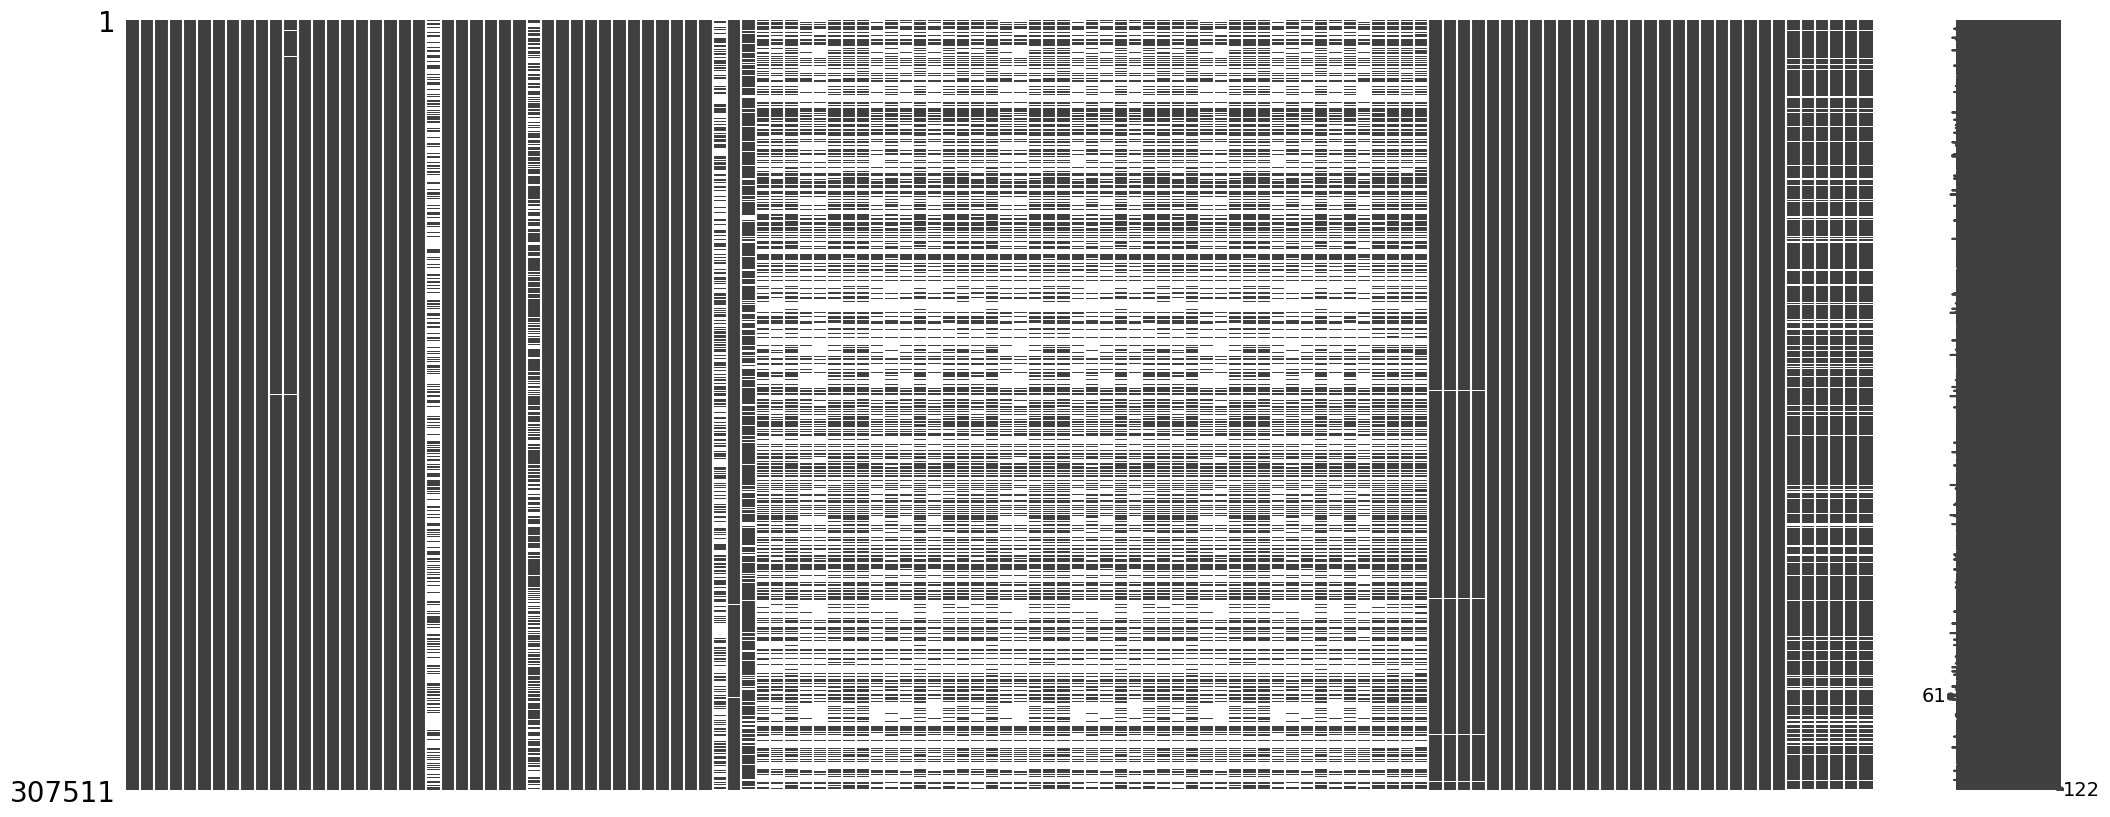

In [5]:
msno.matrix(data)

In [6]:
# Affichage de la description des variables quantitatives
print("Description des variables quantitatives : \n")
data.describe()

Description des variables quantitatives : 



SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [7]:
# Sélection des variables qualitatives
var_qual = data.select_dtypes('object')

# Affichage de la description des variables qualitatives
print("Description des variables qualitatives : \n")
for var in var_qual:
    print(var.upper(), " : ", data[var].nunique())
    print(data[var].unique())
    print(data[var].value_counts(), "\n")

Description des variables qualitatives : 

NAME_CONTRACT_TYPE  :  2
['Cash loans' 'Revolving loans']
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64 

CODE_GENDER  :  3
['M' 'F' 'XNA']
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64 

FLAG_OWN_CAR  :  2
['N' 'Y']
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64 

FLAG_OWN_REALTY  :  2
['Y' 'N']
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64 

NAME_TYPE_SUITE  :  7
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64 

NAME_INCOME_TYPE  :  8
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
N

II. Démarche méthodologique de nettoyage des données
****************************************************

A. Identification et traitement des doublons

In [8]:
# Calcul du nombre de ligne en double 
duplicated_lines = data.duplicated().sum()
print(f"{duplicated_lines} lignes en double.")

0 lignes en double.


In [9]:
for var in data.columns:
    # Calcul du nombre de doublons dans la colonne
    nb_duplicates = data[var].dropna().duplicated().sum()
    # Récupération des valeurs dupliquées
    duplicates = data[var].where(data[var].duplicated()).unique()

    # Affichage des informations sur les doublons
    if nb_duplicates > 0:
        print(var, ':', nb_duplicates, 'duplications')
        print('exemples :', duplicates, '\n')

TARGET : 307509 duplications
exemples : [nan  0.  1.] 

NAME_CONTRACT_TYPE : 307509 duplications
exemples : [nan 'Cash loans' 'Revolving loans'] 

CODE_GENDER : 307508 duplications
exemples : [nan 'M' 'F' 'XNA'] 

FLAG_OWN_CAR : 307509 duplications
exemples : [nan 'N' 'Y'] 

FLAG_OWN_REALTY : 307509 duplications
exemples : [nan 'Y' 'N'] 

CNT_CHILDREN : 307496 duplications
exemples : [nan  0.  1.  2.  3.  4.  5.  6.  7.  8. 12. 14. 10. 19.  9.] 

AMT_INCOME_TOTAL : 304963 duplications
exemples : [       nan  135000.    112500.     67500.    202500.     90000.
  270000.    360000.    121500.     99000.    108000.    225000.
   81000.    180000.    540000.    157500.    171000.     76500.
   54000.    126000.    103500.    292500.    130500.    450000.
  117000.    315000.     58500.    162000.    216000.    144000.
  247500.     72000.     85500.     63000.    166500.    153000.
  211500.    405000.    193500.    189000.     49500.    337500.
  184500.     87750.     45000.    243000.  

B. Identification et traitement des valeurs manquantes

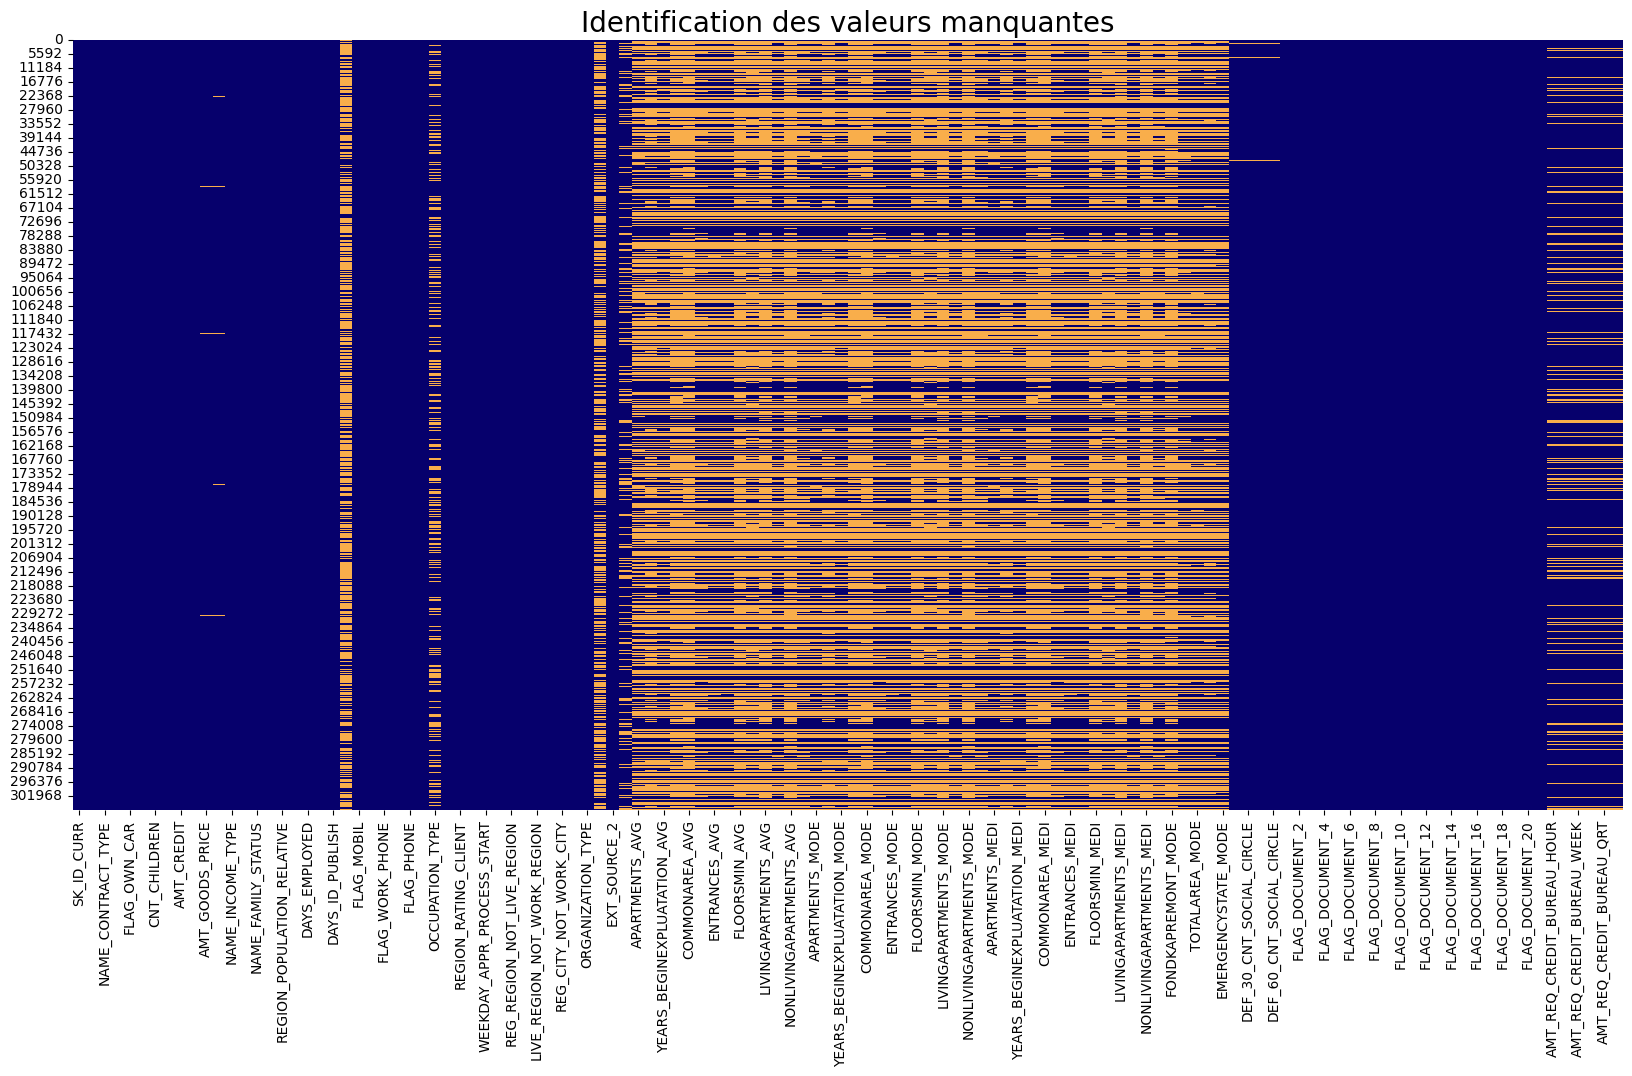

In [10]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes", fontsize=20)
custom_colors = ["#06006C", "#F9AE4B"] 
sns.heatmap(data.isna(), cbar=False, cmap=sns.color_palette(custom_colors))
plt.show()

In [11]:
total_na = data.isna().sum().sum()
total_percent_na = (data.isna().sum().sum() * 100 / data.size).round(2) 
print("Nombre total de valeurs manquantes dans le dataset = ", total_na, "environ", total_percent_na,"% du dataset.")

Nombre total de valeurs manquantes dans le dataset =  9152465 environ 24.4 % du dataset.


In [12]:
# Initialisation du dictionnaire pour stocker les informations de complétion
completion = {}

# Calcul du nombre de valeurs non nulles, de valeurs manquantes et du pourcentage de valeurs manquantes pour chaque colonne
for var in data.columns:
    nbr_values = data[var].notna().sum()
    na_values = data[var].isna().sum()
    na_percent = 100 * na_values / data.shape[0]
    completion[var] = [nbr_values, na_percent]
    
# Affichage des informations de complétion pour chaque colonne
print('column_name : nbr_values -> percentage_of_Na', '\n')
for var in completion:
    nbr_values = completion[var][0]
    na_percent = completion[var][1]
    print(f'{var} : {nbr_values} valeurs -> {int(na_percent)}% Na')

column_name : nbr_values -> percentage_of_Na 

SK_ID_CURR : 307511 valeurs -> 0% Na
TARGET : 307511 valeurs -> 0% Na
NAME_CONTRACT_TYPE : 307511 valeurs -> 0% Na
CODE_GENDER : 307511 valeurs -> 0% Na
FLAG_OWN_CAR : 307511 valeurs -> 0% Na
FLAG_OWN_REALTY : 307511 valeurs -> 0% Na
CNT_CHILDREN : 307511 valeurs -> 0% Na
AMT_INCOME_TOTAL : 307511 valeurs -> 0% Na
AMT_CREDIT : 307511 valeurs -> 0% Na
AMT_ANNUITY : 307499 valeurs -> 0% Na
AMT_GOODS_PRICE : 307233 valeurs -> 0% Na
NAME_TYPE_SUITE : 306219 valeurs -> 0% Na
NAME_INCOME_TYPE : 307511 valeurs -> 0% Na
NAME_EDUCATION_TYPE : 307511 valeurs -> 0% Na
NAME_FAMILY_STATUS : 307511 valeurs -> 0% Na
NAME_HOUSING_TYPE : 307511 valeurs -> 0% Na
REGION_POPULATION_RELATIVE : 307511 valeurs -> 0% Na
DAYS_BIRTH : 307511 valeurs -> 0% Na
DAYS_EMPLOYED : 307511 valeurs -> 0% Na
DAYS_REGISTRATION : 307511 valeurs -> 0% Na
DAYS_ID_PUBLISH : 307511 valeurs -> 0% Na
OWN_CAR_AGE : 104582 valeurs -> 65% Na
FLAG_MOBIL : 307511 valeurs -> 0% Na
FLAG_EMP

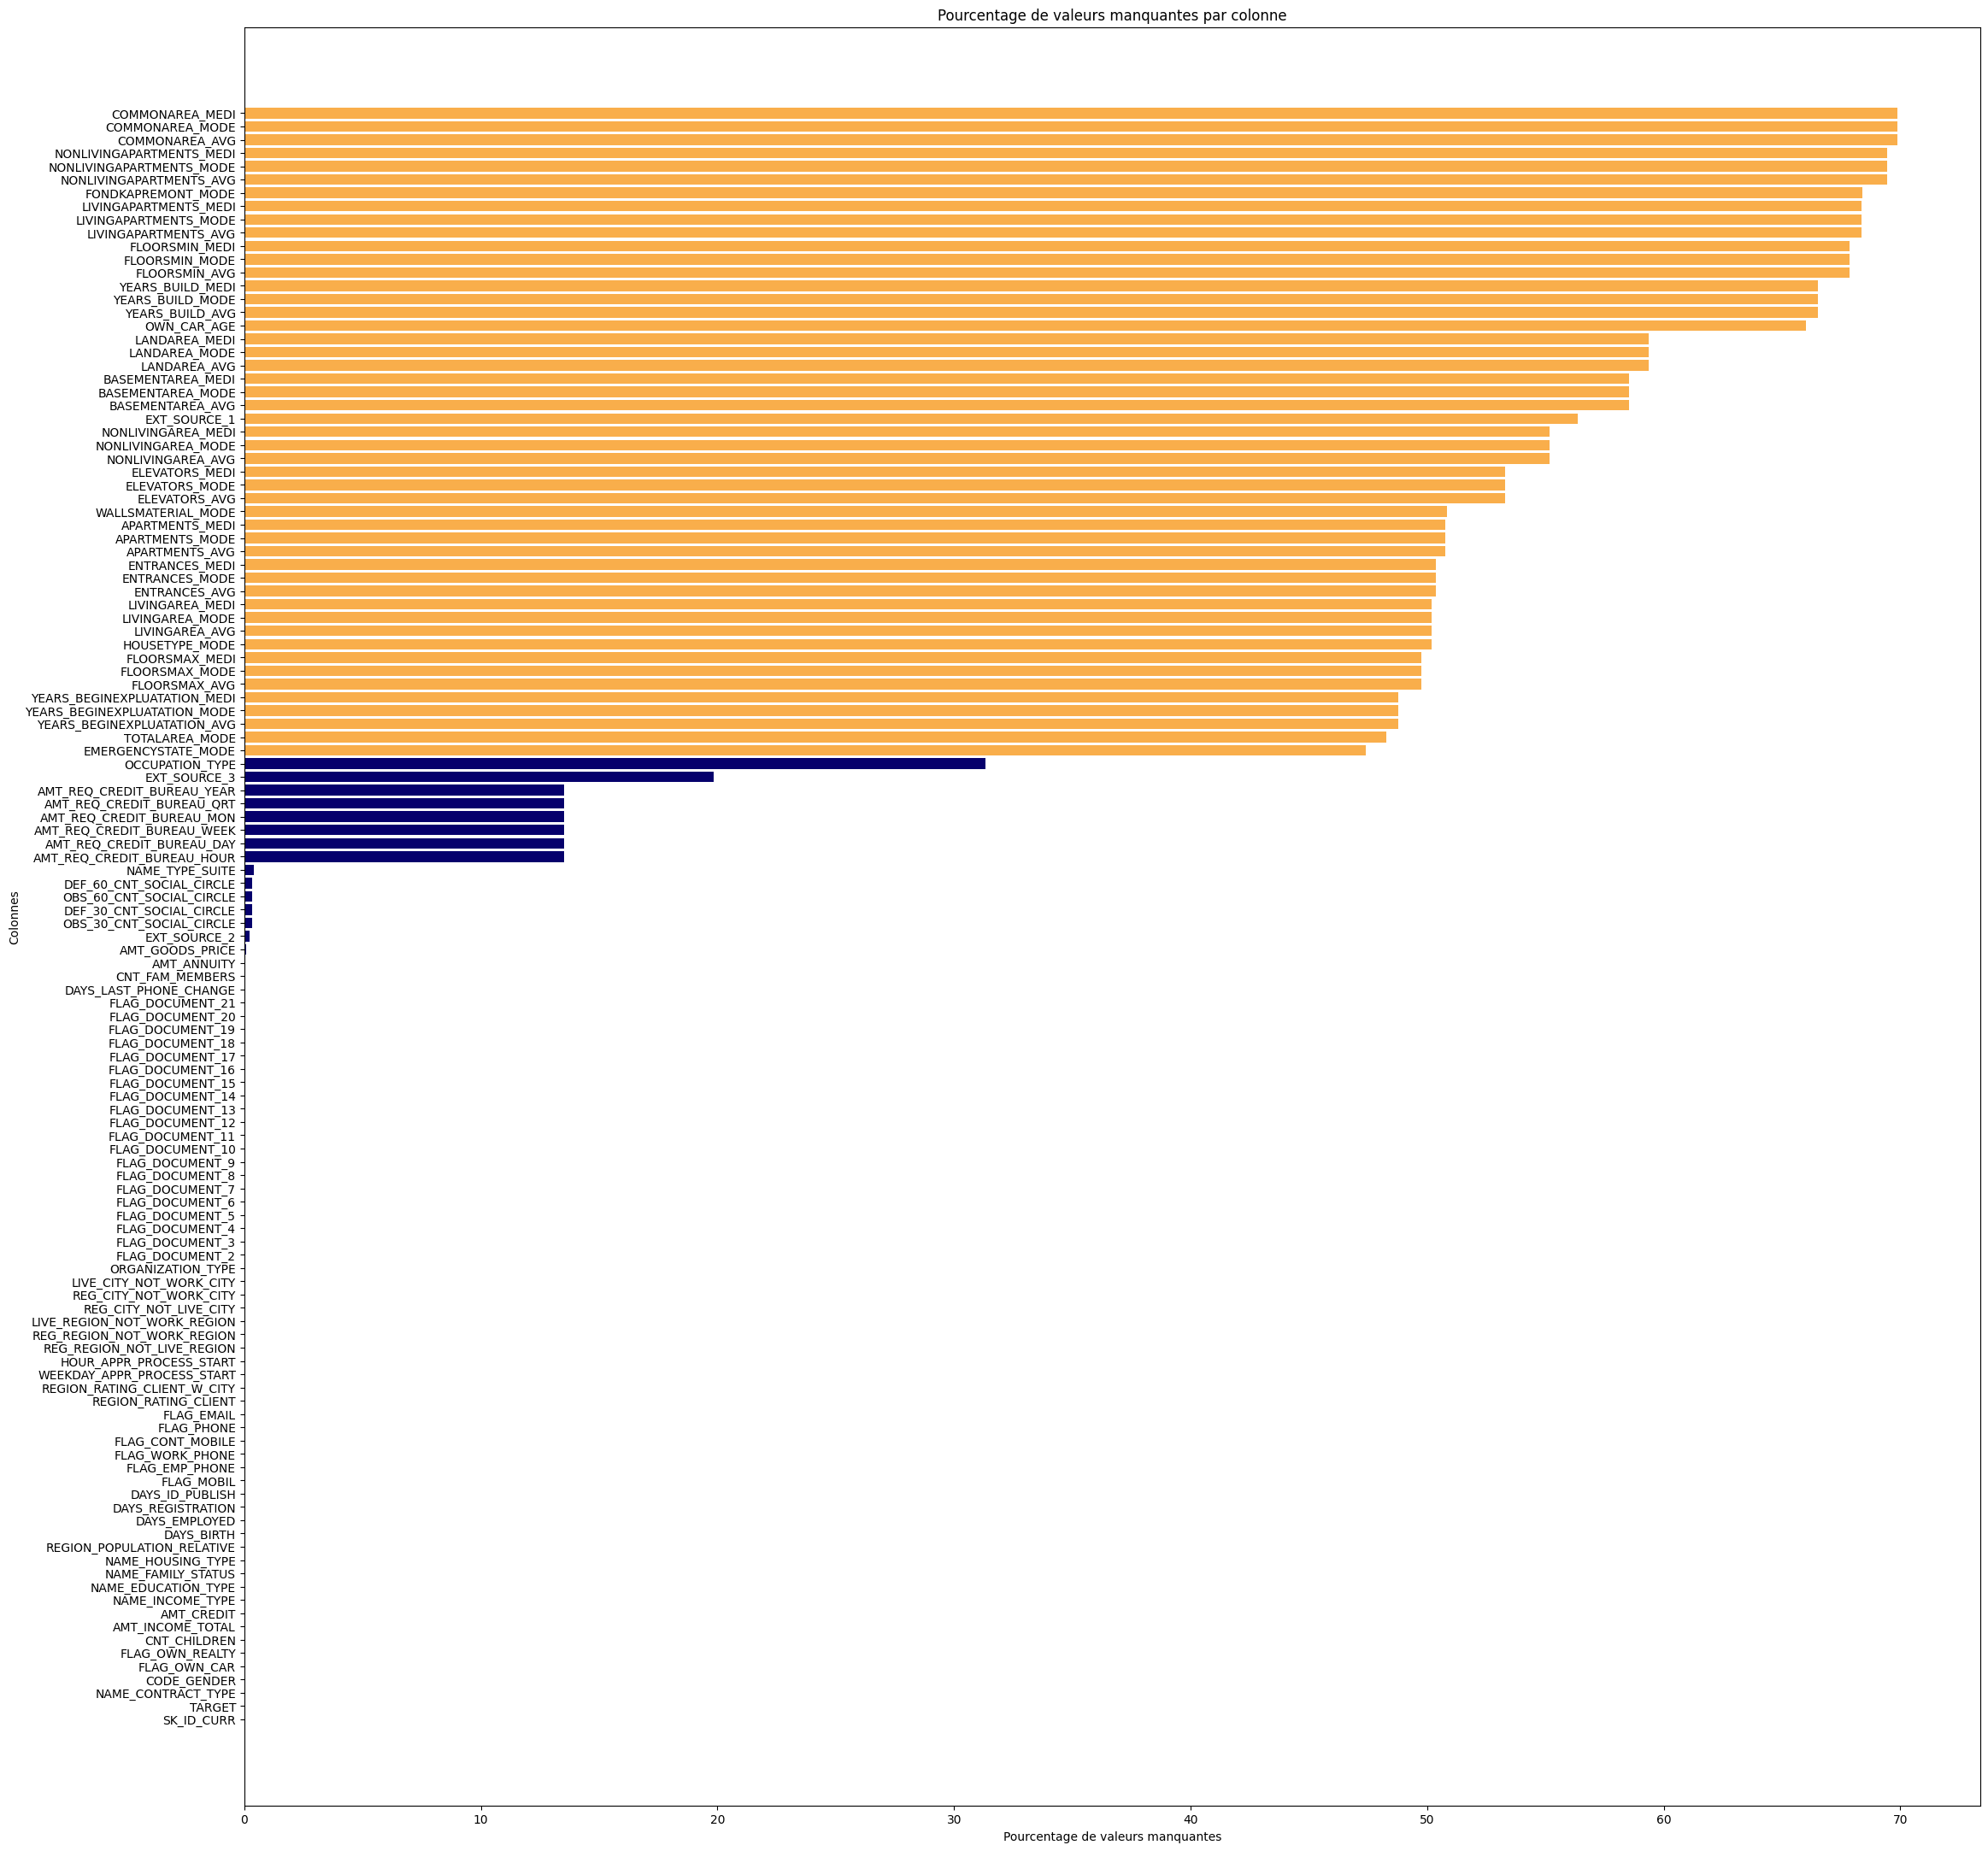

In [13]:
column_completion = {}
for var in data.columns:
    na_values = data[var].isna().sum()
    na_percent = 100 * na_values / data.shape[0]
    column_completion[var] = na_percent

# Extraire les clés et les valeurs du dictionnaire
keys = list(column_completion.keys())
values = list(column_completion.values())

# Tri des données par pourcentage de valeurs manquantes
sorted_indices = sorted(range(len(values)), key=lambda k: values[k])
keys_sorted = [keys[i] for i in sorted_indices]
values_sorted = [values[i] for i in sorted_indices]

# Créer le graphique à barres en utilisant les listes triées keys_sorted et values_sorted en mettant en évidence les variables avec plus de 35% de Na
plt.barh(keys_sorted, values_sorted, color=['#F9AE4B' if value > 35 else '#06006C' for value in values_sorted])

# Ajouter des étiquettes aux axes et un titre
plt.ylabel('Colonnes')  # L'axe y est maintenant les colonnes
plt.xlabel('Pourcentage de valeurs manquantes')
plt.title('Pourcentage de valeurs manquantes par colonne')

# Définir la limite de l'axe x pour commencer à 0
plt.xlim(left=0)
plt.tight_layout(pad=-60)

# Afficher le graphique
plt.show()

In [14]:
# Création d'une liste des colonnes avec un pourcentage de valeurs manquantes supérieur ou égal à 35%
columns_too_empty = [column for column, percent in completion.items() if percent[1] >= 35]

# Affichage des colonnes avec un pourcentage de valeurs manquantes élevé
columns_too_empty

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [15]:
# Affiche le nombre de colonnes avec plus de 35% de valeurs manquantes
print("Nombre de colonnes avec plus de 35% de valeur manquante : ", len(columns_too_empty), "\n")

# Affiche la forme du DataFrame avant la suppression des colonnes inutiles avec plus de 35% de valeurs manquantes
print("Data shape avant exclusion des variables inutiles avec plus de 35% de valeurs manquantes : ", data.shape)

# Supprime les colonnes inutiles avec plus de 35% de valeurs manquantes
data.drop(columns=columns_too_empty, inplace=True)

# Affiche la forme du DataFrame après la suppression des colonnes inutiles avec plus de 35% de valeurs manquantes
print("Data shape après exclusion des variables inutiles avec plus de 35% de valeurs manquantes : ", data.shape)

Nombre de colonnes avec plus de 35% de valeur manquante :  49 

Data shape avant exclusion des variables inutiles avec plus de 35% de valeurs manquantes :  (307511, 122)
Data shape après exclusion des variables inutiles avec plus de 35% de valeurs manquantes :  (307511, 73)


In [16]:
# Initialisation du dictionnaire pour stocker les informations de complétion pour chaque ligne
line_completion = {}

# Initialisation du compteur de lignes avec plus de 35% de valeurs manquantes
l = 0

# Parcours de chaque ligne du DataFrame
for index, row in data.iterrows():
    # Calcul du nombre de valeurs manquantes dans la ligne
    na_values = row.isna().sum()
    # Calcul du pourcentage de valeurs manquantes dans la ligne
    na_percent = 100 * na_values / data.shape[1]
    # Enregistrement du pourcentage de valeurs manquantes pour la ligne
    line_completion[index] = na_percent
    # Vérification si le pourcentage de valeurs manquantes dans la ligne est supérieur ou égal à 35%
    if na_percent >= 35:
        # Incrémentation du compteur de lignes avec plus de 35% de valeurs manquantes
        l += 1

# Affichage du nombre de lignes avec plus de 35% de valeurs manquantes
print("Nombre de lignes avec plus de 35% de valeurs manquantes :", l)

Nombre de lignes avec plus de 35% de valeurs manquantes : 0


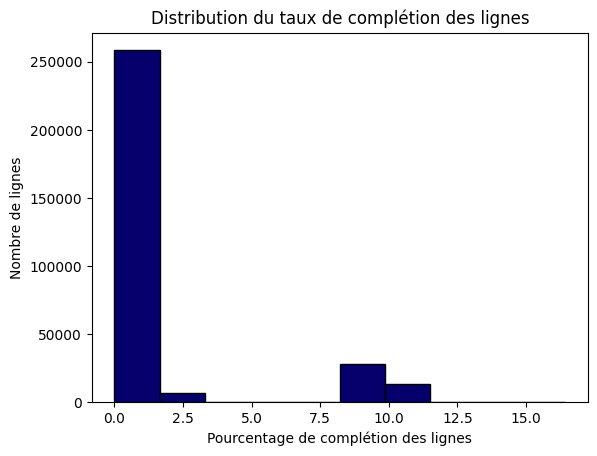

In [17]:
# Extraction des clés (index des lignes) et des valeurs (pourcentages de complétion)
keys_sorted = sorted(line_completion.keys())
values_sorted = [line_completion[key] for key in keys_sorted]

# Création de l'histogramme des pourcentages de complétion des lignes
plt.hist(values_sorted, bins=10, color='#06006C', edgecolor='black')

# Ajout des étiquettes aux axes et d'un titre
plt.xlabel('Pourcentage de complétion des lignes')
plt.ylabel('Nombre de lignes')
plt.title('Distribution du taux de complétion des lignes')

# Affichage du graphique
plt.show()

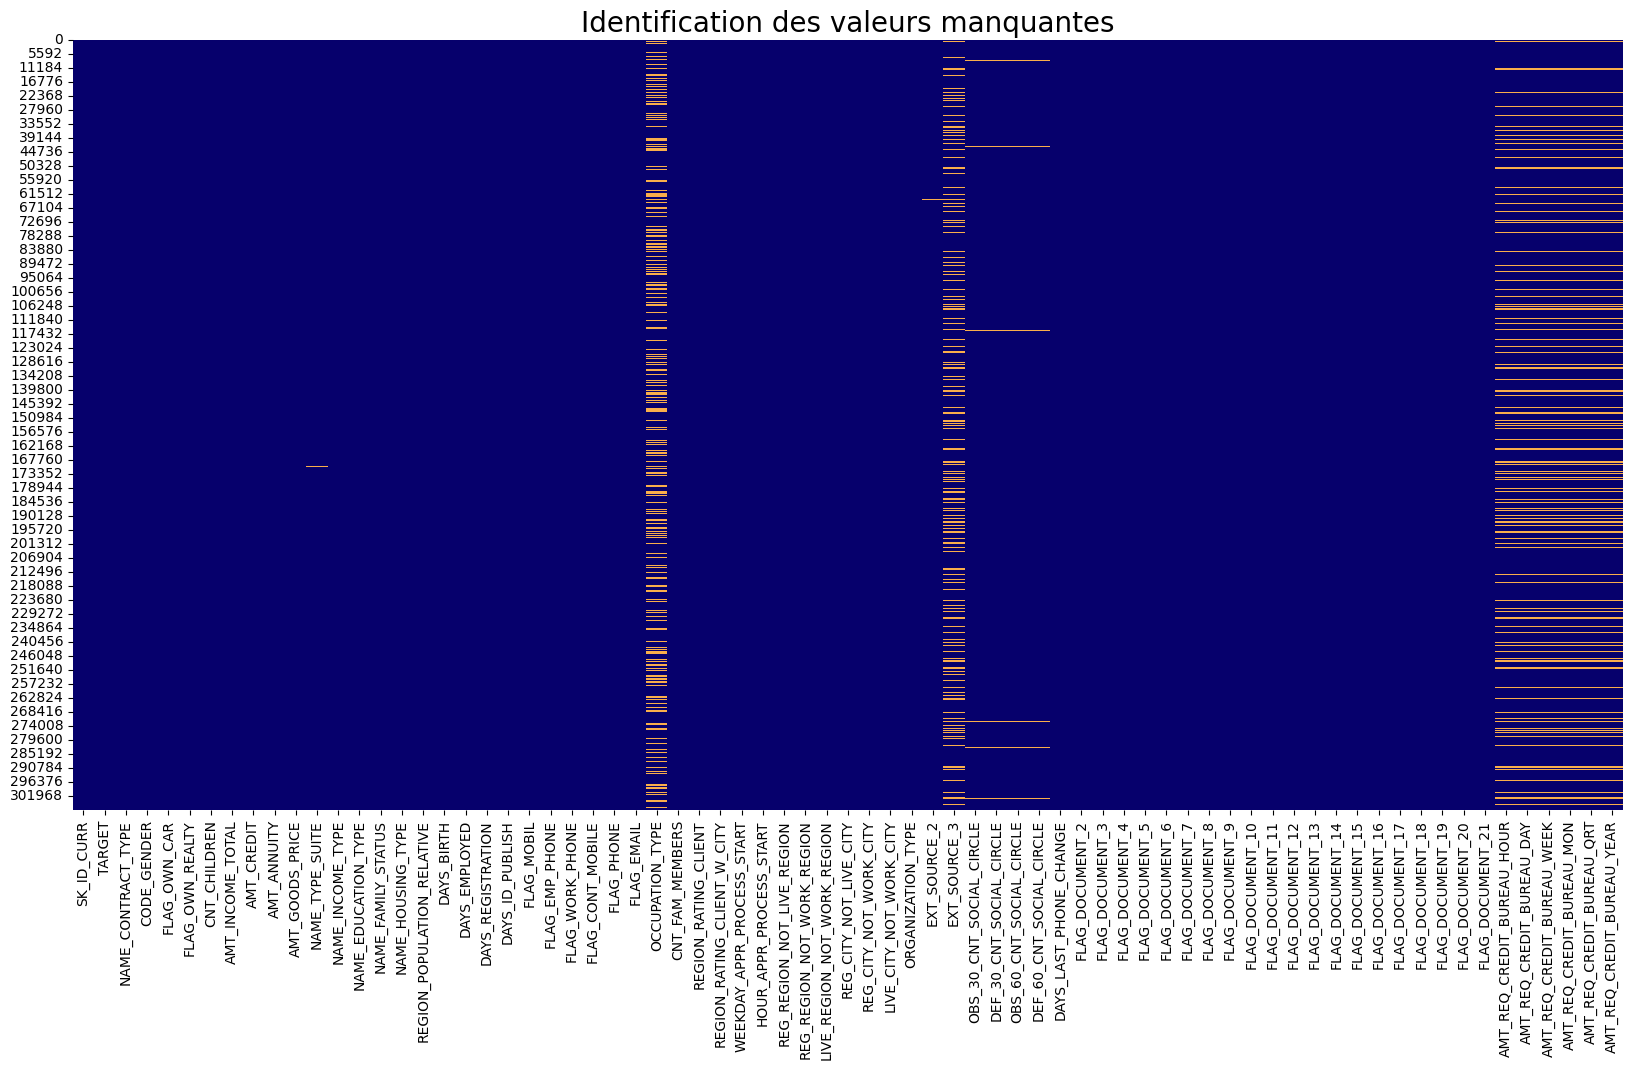

In [18]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes", fontsize=20)
custom_colors = ["#06006C", "#F9AE4B"] 
sns.heatmap(data.isna(), cbar=False, cmap=sns.color_palette(custom_colors))
plt.show()

In [19]:
total_na = data.isna().sum().sum()
total_percent_na = (data.isna().sum().sum() * 100 / data.size).round(2) 
print("Nombre total de valeurs manquantes dans le dataset = ", total_na, "environ", total_percent_na,"% du dataset.")

Nombre total de valeurs manquantes dans le dataset =  412799 environ 1.84 % du dataset.


In [20]:
# Crée une copie du DataFrame data
cleaned_data = data.copy(deep=True)

# Enregistre le DataFrame cleaned_data dans un fichier CSV
cleaned_data.to_csv("../Data/cleaned_data.csv", index=False)

C. Traitement des colonnes

In [21]:
cleaned_data.dtypes.value_counts()

int64      41
float64    20
object     12
Name: count, dtype: int64

In [22]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [23]:
var_bool = []
# Sélection des variables qualitatives
var_qual = cleaned_data.select_dtypes('object')
for var in var_qual:
    nmb = cleaned_data[var].nunique()
    print(nmb, "-->", cleaned_data[var].value_counts(), "\n")
    bool = cleaned_data[var].unique()
    if nmb == 2:
        if bool[0] == 'Y' or bool[0] == 'N' and bool[1] == 'N' or bool[1] == 'Y':
            var_bool.append(var)

2 --> NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64 

3 --> CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64 

2 --> FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64 

2 --> FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64 

7 --> NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64 

8 --> NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64 

5 --> NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher        

In [24]:
# Sélection des variables quantitatives
var_quant = cleaned_data.select_dtypes('int64') + cleaned_data.select_dtypes('float64')
for var in var_quant:
    nmb = cleaned_data[var].nunique()
    bool = cleaned_data[var].unique()
    if nmb <= 10:
        print(nmb, "-->", cleaned_data[var].value_counts(), "\n")
    if nmb == 2: 
        if bool[0] == 0 or bool[0] == 1 and bool[1] == 1 or bool[1] == 0:
            var_bool.append(var)

9 --> AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64 

5 --> AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64 

9 --> AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64 

10 --> DEF_30_CNT_SOCIAL_CIRCLE
0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: count, dtype: int64 

9 --> DEF_60_CNT_SOCIAL_CIRCLE
0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: count, dtype: int64 

2 --> FLAG_CONT_MOBILE
1    306937
0       574
Name: count, dtype: int64 

2 --> FLAG_DOCUME

In [25]:
print(len(var_bool))
var_bool

35


['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'TARGET']

35 variables ne prenant que 2 valeurs Y/N ou 1/0

(N ou Y)
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
 
(0 ou 1)
- FLAG_CONT_MOBILE
- FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21
- FLAG_EMAIL
- FLAG_EMP_PHONE
- FLAG_MOBIL
- FLAG_PHONE
- FLAG_WORK_PHONE
- LIVE_CITY_NOT_WORK_CITY
- LIVE_REGION_NOT_WORK_REGION
- REG_CITY_NOT_LIVE_CITY
- REG_CITY_NOT_WORK_CITY
- REG_REGION_NOT_LIVE_REGION
- REG_REGION_NOT_WORK_REGION
- TARGET

2 variables ne prenant que 3 valeurs 

(1, 2 ou 3)
- REGION_RATING_CLIENT
- REGION_RATING_CLIENT_W_CITY

--> type object to category
 object to category


In [26]:
# Changement des variables de type Object -> type Category
for var in cleaned_data.select_dtypes('object'):
    cleaned_data[var] = cleaned_data[var].astype("category")

In [27]:
cleaned_data.dtypes.value_counts()

int64       41
float64     20
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [28]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

III. Synthèse de l’analyse de données et visualisation des données
******************************************************************

In [29]:
# Récupération des dimensions du DataFrame
datas = cleaned_data.shape
columns = datas[1]
rows = datas[0]

# Comptage des types de données
data_type = cleaned_data.dtypes.value_counts()
var_qual = data_type.iloc[2] + data_type.iloc[3] + data_type.iloc[4] + data_type.iloc[5] + data_type.iloc[6] + data_type.iloc[7] + data_type.iloc[8] + data_type.iloc[9] + data_type.iloc[10] + data_type.iloc[11] + data_type.iloc[12]
var_quant = data_type.iloc[0] + data_type.iloc[1]

# Calcul du nombre total de valeurs
values = cleaned_data.size

# Affichage des informations importantes
print("\033[1m" + "\033[91m" + "Informations importantes :" + "\033[0m" + "\n")
print(f"Total colonnes : {columns} variables.\n")
print(f"    -> {var_qual} variables qualitatives.")
print(f"    -> {var_quant} variables quantitatives.")
print(f"\nTotal lignes : {rows} individus.")
print(f"\nTotal : {values} valeurs.")

Informations importantes :

Total colonnes : 73 variables.

    -> 12 variables qualitatives.
    -> 61 variables quantitatives.

Total lignes : 307511 individus.

Total : 22448303 valeurs.


In [30]:
# Affichage de la description des variables quantitatives
print("Description des variables quantitatives : \n")
cleaned_data.describe()

Description des variables quantitatives : 



SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [31]:
# Sélection des variables quantitatives
var_quant = cleaned_data.select_dtypes(include=['int64'])

# Colonnes bool à exclure
vars_to_exclude = ["FLAG_CONT_MOBILE", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "FLAG_EMAIL", "FLAG_EMP_PHONE", "FLAG_MOBIL", "FLAG_PHONE", "FLAG_WORK_PHONE", "LIVE_CITY_NOT_WORK_CITY", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "TARGET"]

# Exclure les colonnes à partir des variables quantitatives
var_quant = var_quant.drop(columns=vars_to_exclude)


In [32]:
# Définition la fonction pour tracer différents plots interactifs qui prend une variable quantitative comme argument
@interact
def interact_plot(var=var_quant):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(3, 1, 1)
    sns.boxplot(x=var, data=cleaned_data, color='#599191')    
    plt.title("Boxplot pour : " + str(var), fontsize=15)    

    plt.subplot(3, 1, 2)
    sns.violinplot(x=var, data=cleaned_data, color='#FF5876')
    plt.title("Violinplot pour : " + str(var), fontsize=15)

    plt.subplot(3, 1, 3)
    plt.hist(cleaned_data[var], color='#06006C', bins=50)
    plt.ylabel("Nombre d'individus", fontsize=7)
    plt.title("Distribution de : " + str(var), fontsize=15)

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='var', options=('SK_ID_CURR', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_E…

- DAYS_BIRTH
- DAYS_EMPLOYED -> présence potentielle de valeurs aberrantes 
- DAYS_ID_PUBLISH

--> variables négatives (nombre de jours éculés depuis la de demande du prêt)

Statistiques descriptives pour DAYS_BIRTH
count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Statistiques descriptives pour DAYS_ID_PUBLISH
count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

Statistiques descriptives pour DAYS_EMPLOYED
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64



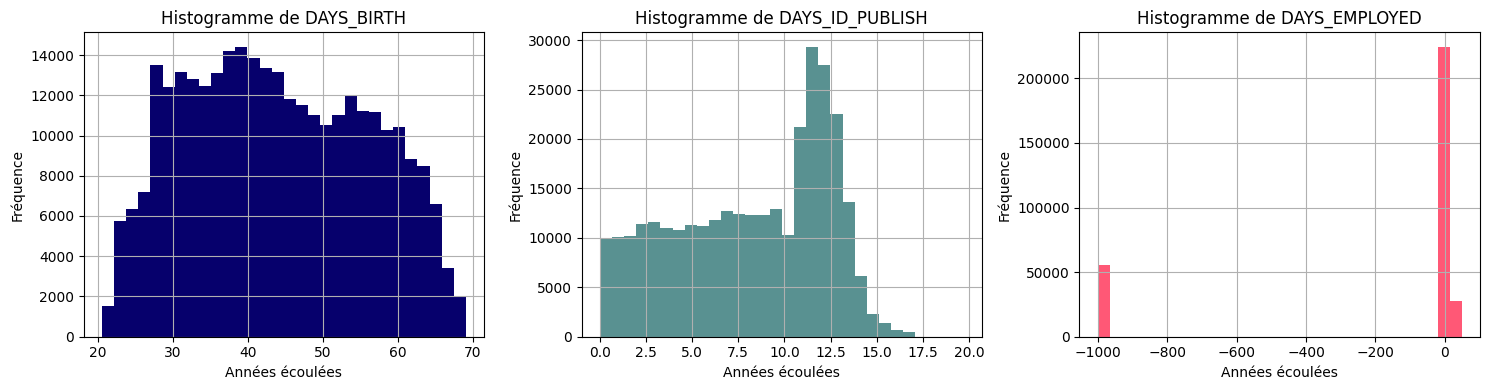

In [33]:
# Variables à tester
var_to_test = ["DAYS_BIRTH", "DAYS_ID_PUBLISH", "DAYS_EMPLOYED"]
colors = ['#06006C','#599191','#FF5876']

# Créer une figure et des sous-graphiques
fig, axes = plt.subplots(1, len(var_to_test), figsize=(15, 4))

# Itérer sur les variables et dessiner les histogrammes
for i, var in enumerate(var_to_test):
    # Afficher les statistiques descriptives
    print("Statistiques descriptives pour", var)
    print(cleaned_data[var].describe())
    print()
    
    # Dessiner l'histogramme pour la variable spécifiée
    (cleaned_data[var] / -365).hist(ax=axes[i], color=colors[i], bins=30)
    # Ajouter des titres et des étiquettes
    axes[i].set_title("Histogramme de " + var)
    axes[i].set_xlabel("Années écoulées")
    axes[i].set_ylabel("Fréquence")

# Ajuster la disposition
plt.tight_layout()
plt.show()

J'observe des données aberrantes, je les traite en remplaçant la valeur abérrante par rien.

In [34]:
cleaned_data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

In [35]:
(cleaned_data['DAYS_EMPLOYED'] / -365).describe()

count    252137.000000
mean          6.531971
std           6.406466
min          -0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

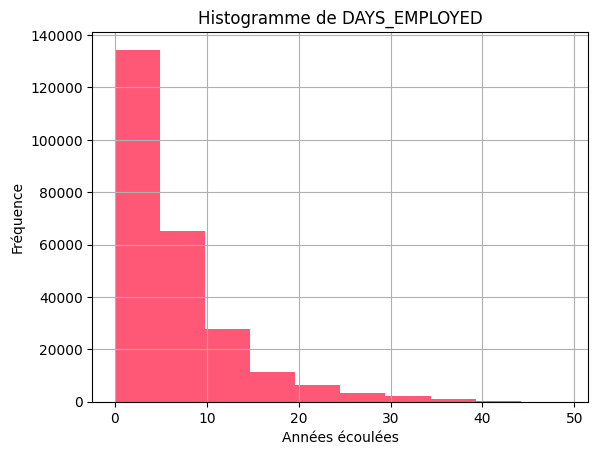

In [36]:
# Tracer l'histogramme pour 'DAYS_EMPLOYED' converti en années
(cleaned_data['DAYS_EMPLOYED'] / -365).hist(color='#FF5876')
plt.title("Histogramme de DAYS_EMPLOYED")
plt.xlabel("Années écoulées")
plt.ylabel("Fréquence")

# Afficher le graphique
plt.show()

In [37]:
# Sélection des variables quantitatives
var_quant = cleaned_data.select_dtypes(include=['float64'])

# Définition la fonction pour tracer différents plots interactifs qui prend une variable quantitative comme argument
@interact
def interact_plot(var=var_quant):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(3, 1, 1)
    sns.boxplot(x=var, data=cleaned_data, color='#599191')    
    plt.title("Boxplot pour : " + str(var), fontsize=15)    

    plt.subplot(3, 1, 2)
    sns.violinplot(x=var, data=cleaned_data, color='#FF5876')
    plt.title("Violinplot pour : " + str(var), fontsize=15)

    plt.subplot(3, 1, 3)
    plt.hist(cleaned_data[var], color='#06006C', bins=50)
    plt.ylabel("Nombre d'individus", fontsize=7)
    plt.title("Distribution de : " + str(var), fontsize=15)

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='var', options=('AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'A…

- DAYS_REGISTRATION
- DAYS_LAST_PHONE_CHANGE

--> variables négatives (nombre de jours éculés depuis l'enregistrement, ou depuis la dernière modification)

Statistiques descriptives pour DAYS_REGISTRATION
count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

Statistiques descriptives pour DAYS_LAST_PHONE_CHANGE
count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64



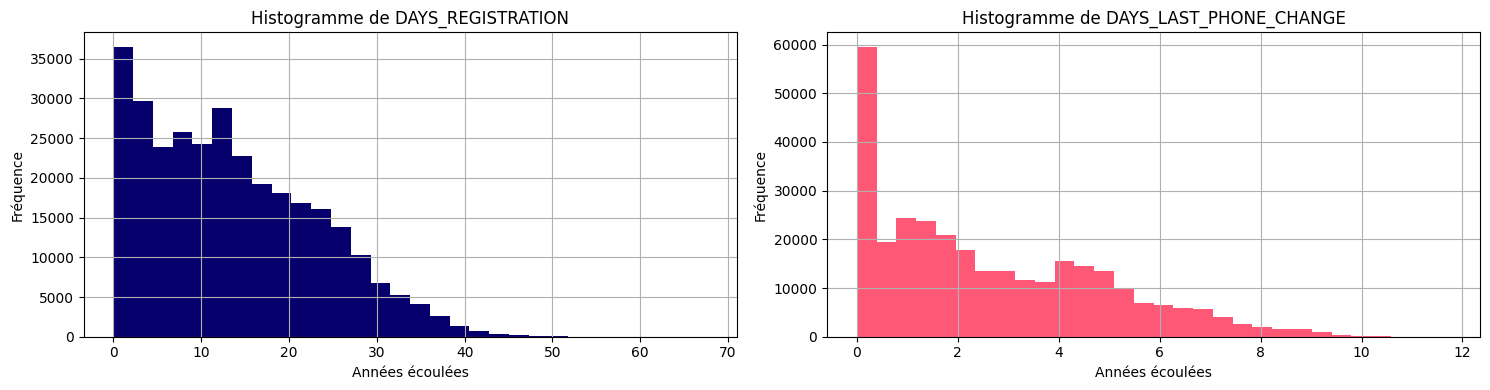

In [38]:
# Variables à tester
var_to_test = ["DAYS_REGISTRATION", "DAYS_LAST_PHONE_CHANGE"]
colors = ['#06006C','#FF5876']

# Créer une figure et des sous-graphiques
fig, axes = plt.subplots(1, len(var_to_test), figsize=(15, 4))

# Itérer sur les variables et dessiner les histogrammes
for i, var in enumerate(var_to_test):
    # Afficher les statistiques descriptives
    print("Statistiques descriptives pour", var)
    print(cleaned_data[var].describe())
    print()
    
    # Dessiner l'histogramme pour la variable spécifiée
    (cleaned_data[var] / -365).hist(ax=axes[i], color=colors[i], bins=30)
    # Ajouter des titres et des étiquettes
    axes[i].set_title("Histogramme de " + var)
    axes[i].set_xlabel("Années écoulées")
    axes[i].set_ylabel("Fréquence")

# Ajuster la disposition
plt.tight_layout()
plt.show()

In [39]:
cleaned_data['AMT_INCOME_TOTAL'].replace(1.170000e+08, np.nan, inplace= True)

In [40]:
# Sélection des variables qualitatives
var_qual = cleaned_data.select_dtypes('category')

# Affichage de la description des variables qualitatives
print("Description des variables qualitatives : \n")
for var in var_qual:
    print(var.upper(), " : ", cleaned_data[var].nunique())
    print(cleaned_data[var].unique())
    print(cleaned_data[var].value_counts(), "\n")

Description des variables qualitatives : 

NAME_CONTRACT_TYPE  :  2
['Cash loans', 'Revolving loans']
Categories (2, object): ['Cash loans', 'Revolving loans']
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64 

CODE_GENDER  :  3
['M', 'F', 'XNA']
Categories (3, object): ['F', 'M', 'XNA']
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64 

FLAG_OWN_CAR  :  2
['N', 'Y']
Categories (2, object): ['N', 'Y']
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64 

FLAG_OWN_REALTY  :  2
['Y', 'N']
Categories (2, object): ['N', 'Y']
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64 

NAME_TYPE_SUITE  :  7
['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', NaN, 'Other_B', 'Group of people']
Categories (7, object): ['Children', 'Family', 'Group of people', 'Other_A', 'Other_B', 'Spouse, partner', 'Unaccompanied']
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40

In [41]:
var_low_cardinality = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
var_medium_cardinality = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START']
var_high_cardinality = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

In [42]:
# Créer des diagrammes pour afficher la répartition des variables additifs
@interact
def interactive_pieplot(var=var_low_cardinality):
    plt.figure(figsize=(10,7))
    plt.title('Répartition pour la variable : ' + var, fontsize=15)
    cleaned_data[var].value_counts().plot.pie(autopct='%1.1f%%', colors = ["#599191", "#FF5876","#06006C"])
    plt.show()

interactive(children=(Dropdown(description='var', options=('NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR'…

In [43]:
# Créer des diagrammes pour afficher la répartition des variables additifs
@interact
def interactive_barplot(var=var_medium_cardinality):
    color1 = '#FF5876'
    color2 = '#599191'

    cmap = LinearSegmentedColormap.from_list('custom', [color1, color2])
    value_counts = cleaned_data[var].value_counts()
    plt.figure(figsize=(15,8))
    bars = []
    for i, (value, count) in enumerate(value_counts.items()):
        bar = plt.bar(value, count, color=cmap(i / len(value_counts)))
        bars.append(bar[0])
    plt.title("Nombre d'individus pour chaque " + var, fontsize=20)
    plt.xlabel(var)
    plt.ylabel("Nombre d'individus")
    plt.xticks(rotation=45)
    leg = plt.legend(bars, value_counts.index, loc='upper left', bbox_to_anchor=(1, 1), fontsize='large', title="Légende", title_fontsize='large')
    plt.tight_layout(rect=[0,0,0.85,1])
    plt.show()

interactive(children=(Dropdown(description='var', options=('NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCAT…

In [44]:
# Créer des nuages de mots pour afficher la répartition des variables d'infos produits
@interact
def interactive_wordcloud(var=var_high_cardinality):
    var_occurences = cleaned_data[var].value_counts().to_dict()
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(var_occurences)
    plt.figure(figsize=(20,15))
    plt.title("Représentation visuelle du nombre de produits pour chaque " + var, fontsize=20)
    plt.imshow(wordcloud)
    plt.axis("off")

interactive(children=(Dropdown(description='var', options=('OCCUPATION_TYPE', 'ORGANIZATION_TYPE'), value='OCC…

**********************************
**Analyse de la variable cible :**

In [45]:
# Sélection de la variable cible
var = 'TARGET'

# Affichage de la description de la variable cible
print("Descriptionde la variable cible : \n")
print(var.upper(), " : ", cleaned_data[var].nunique())
print(cleaned_data[var].unique())
print(cleaned_data[var].value_counts(), "\n")

Descriptionde la variable cible : 

TARGET  :  2
[1 0]
TARGET
0    282686
1     24825
Name: count, dtype: int64 



/!\ sous-échantillonage de la valeur 1 par rapport à la valeur 0 /!\ 

<Axes: ylabel='count'>

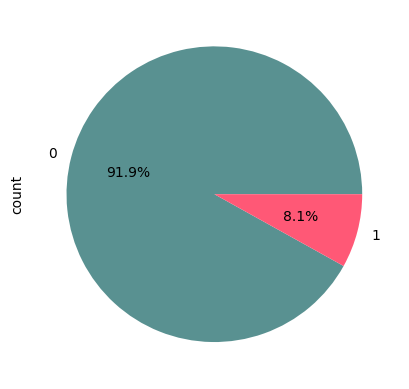

In [46]:
cleaned_data[var].value_counts().plot.pie(autopct='%1.1f%%', colors = ["#599191", "#FF5876","#06006C"])

*****************************************************
**Analyse des correlations avec la variable cible :**

In [47]:
numeric_data = cleaned_data.select_dtypes(include=[np.number])
correls = numeric_data.corr()['TARGET'].sort_values()

print('Correlations Positives les plus élevées:\n',correls.tail(15),'\n')
print('Correlations Negatives les plus élevées:\n',correls.head(15))

Correlations Positives les plus élevées:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64 

Correlations Negatives les plus élevées:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
AMT_CREDIT                   -0.030369
FLAG_DOCUMENT_6              -0.028602
HOUR_APPR_PROCESS_START      -0.024166
FLAG_PHONE  

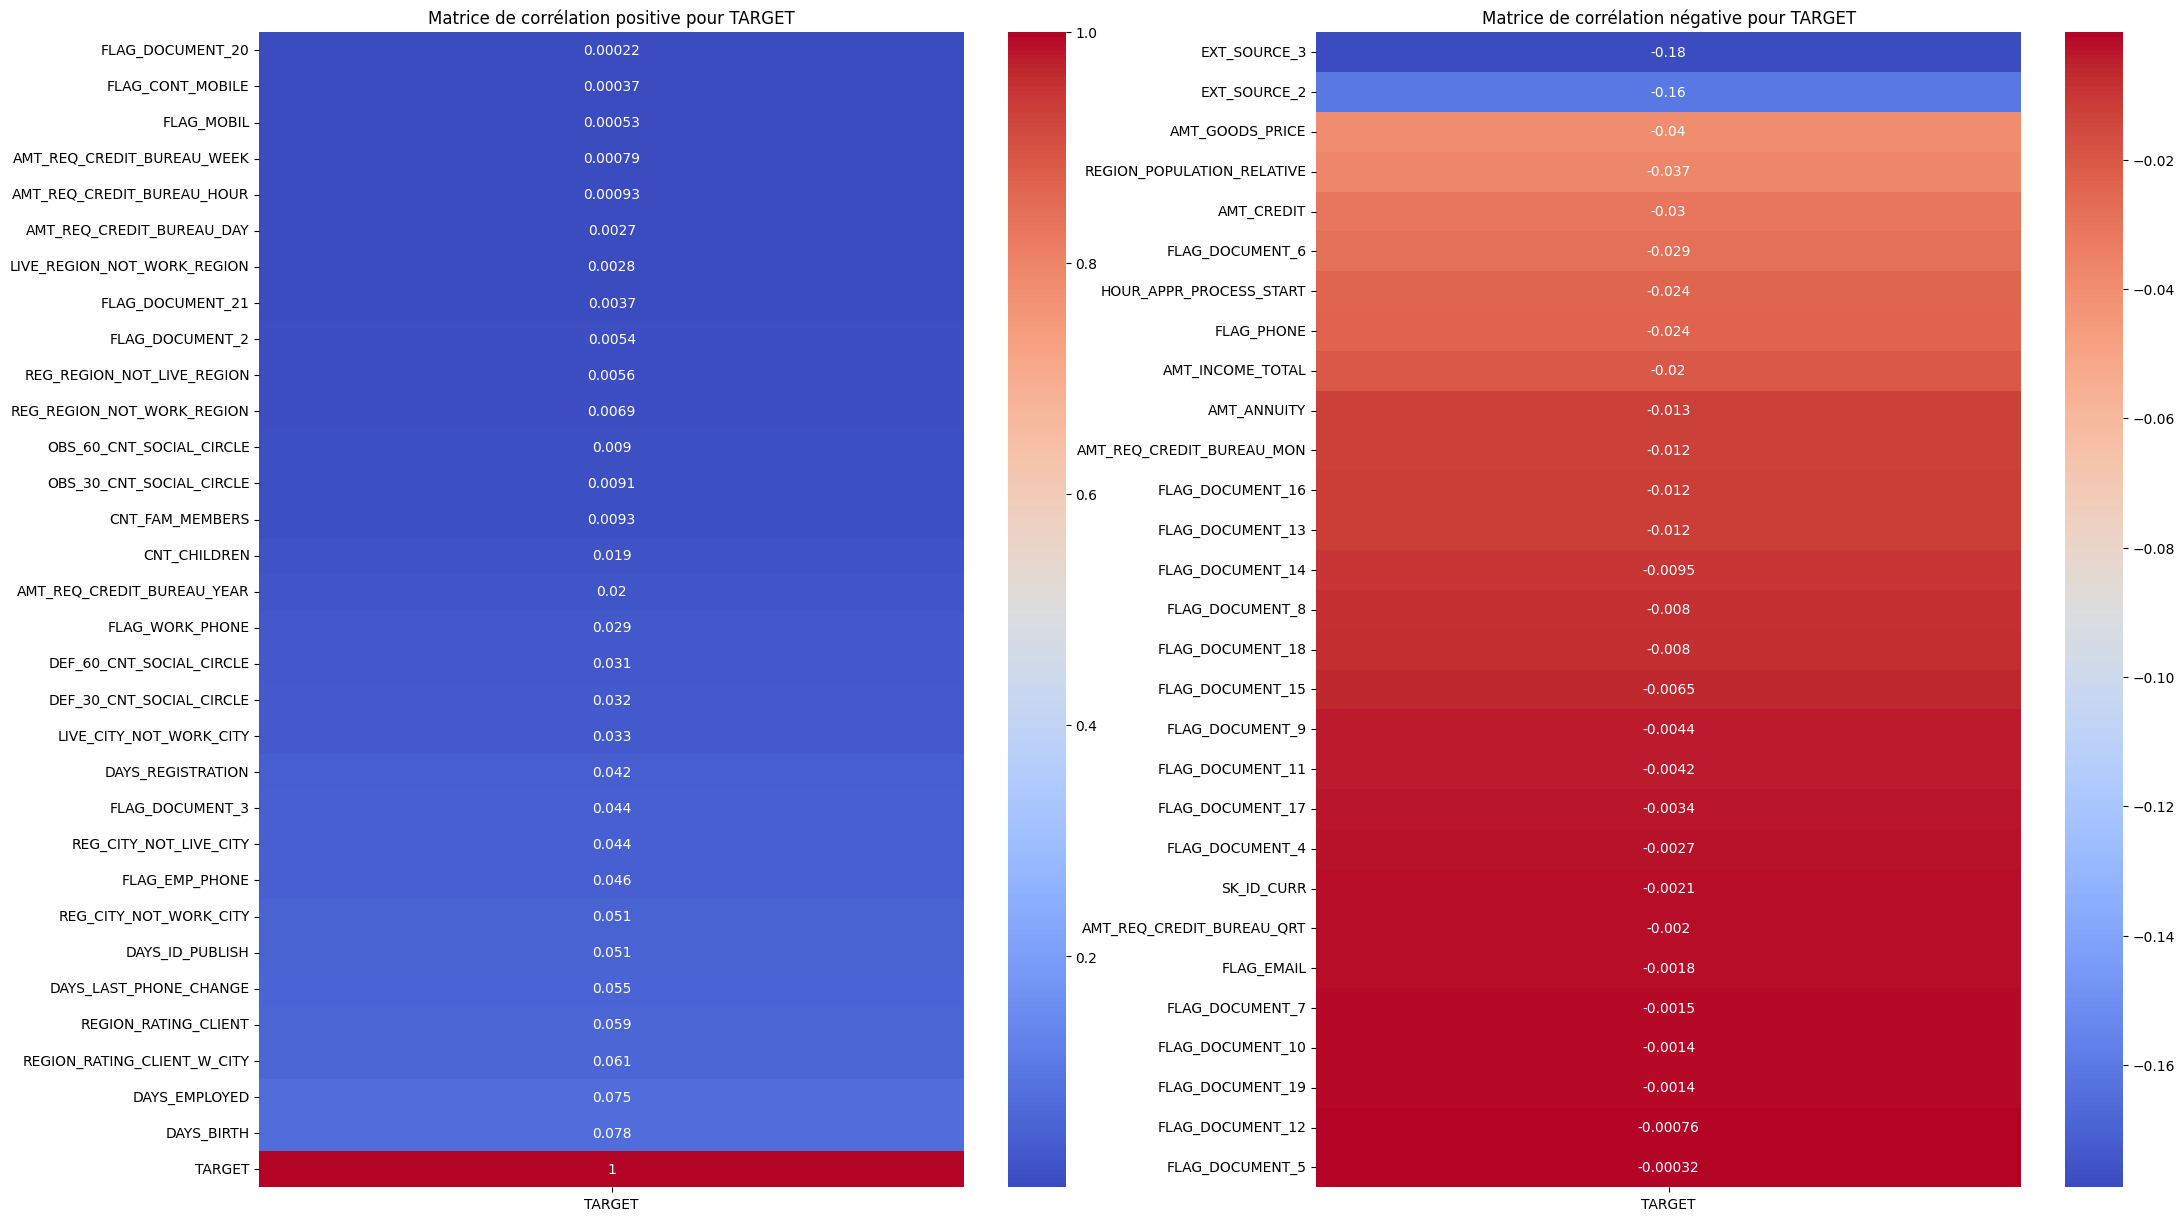

In [48]:
# Calculer la matrice de corrélation
corr_matrix = numeric_data.corr()

# Séparer et trier les corrélations positives et négatives
positive_corr = corr_matrix[['TARGET']][corr_matrix['TARGET'] > 0].sort_values(by='TARGET')
negative_corr = corr_matrix[['TARGET']][corr_matrix['TARGET'] < 0].sort_values(by='TARGET')

# Créer une figure pour les heatmaps
plt.figure(figsize=(25, 15))

# Créer une heatmap de la matrice de corrélation pour les corrélations positives de 'TARGET'
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, position 1
sns.heatmap(positive_corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation positive pour TARGET')

# Créer une heatmap de la matrice de corrélation pour les corrélations négatives de 'TARGET'
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, position 2
sns.heatmap(negative_corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation négative pour TARGET')

# Afficher les heatmaps
plt.show()

Corrélations les plus élevées :
- positivement : DAYS_BIRTH & DAYS_EMPLOYED (8%)
- négativement : EXT_SOURCE_3 (18%) & EXT_SOURCE_2 (16%)

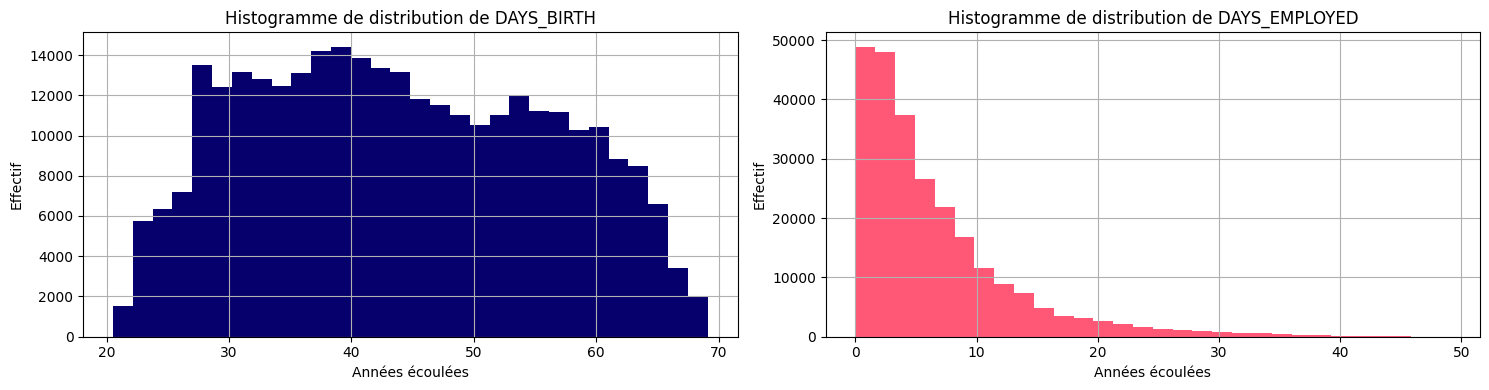

In [49]:
# Variables à tester
var_to_test = ["DAYS_BIRTH", "DAYS_EMPLOYED"]
colors = ['#06006C','#FF5876']

# Créer une figure et des sous-graphiques
fig, axes = plt.subplots(1, len(var_to_test), figsize=(15, 4))

# Itérer sur les variables et dessiner les histogrammes
for i, var in enumerate(var_to_test):
    # Dessiner l'histogramme pour la variable spécifiée
    (cleaned_data[var] / -365).hist(ax=axes[i], color=colors[i], bins=30)
    # Ajouter des titres et des étiquettes
    axes[i].set_title("Histogramme de distribution de " + var)
    axes[i].set_xlabel("Années écoulées")
    axes[i].set_ylabel("Effectif")

# Ajuster la disposition
plt.tight_layout()
plt.show()

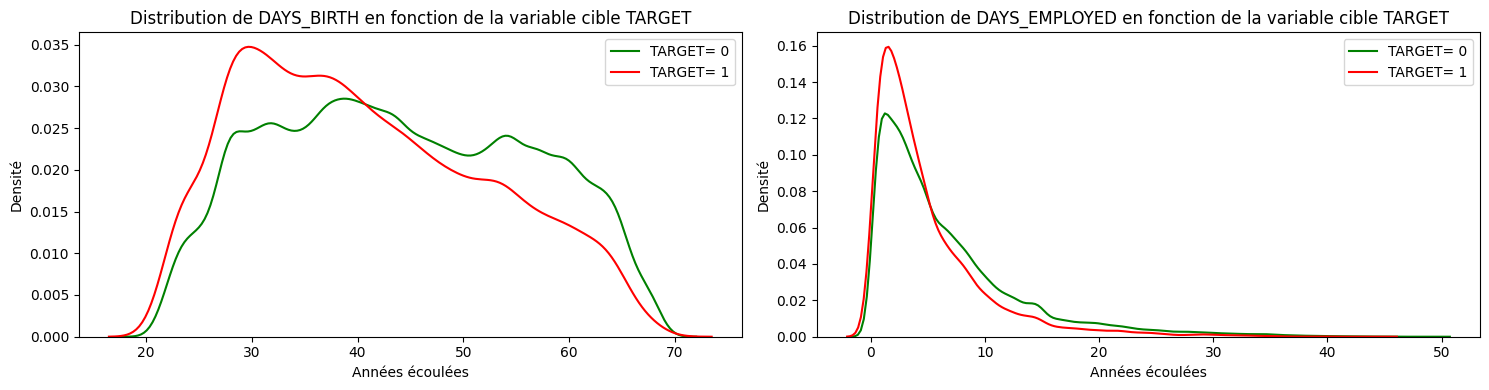

In [50]:
# Variables à tester
var_to_test = ["DAYS_BIRTH", "DAYS_EMPLOYED"]
colors = ['red','green']

# Créer une figure et des sous-graphiques
fig, axes = plt.subplots(1, len(var_to_test), figsize=(15, 4))

# Itérer sur les variables et dessiner les histogrammes
for i, var in enumerate(var_to_test):
    # Dessiner l'histogramme pour la variable spécifiée
    sns.kdeplot((cleaned_data.loc[cleaned_data['TARGET'] == 0, var] / -365), ax=axes[i], color=colors[1], label = 'TARGET= 0')
    sns.kdeplot((cleaned_data.loc[cleaned_data['TARGET'] == 1, var] / -365), ax=axes[i], color=colors[0], label = 'TARGET= 1')
    # Ajouter des titres et des étiquettes
    axes[i].set_title("Distribution de " + var + " en fonction de la variable cible TARGET")
    axes[i].set_xlabel("Années écoulées")
    axes[i].set_ylabel("Densité")
    axes[i].legend()

# Ajuster la disposition
plt.tight_layout()
plt.show()

#### Etude du défaut de remboursement

In [51]:
years_data = cleaned_data[['TARGET', 'DAYS_BIRTH', 'DAYS_EMPLOYED']].copy()
years_data['YEARS_BIRTH'] = abs(years_data['DAYS_BIRTH'] / 365).round()
years_data['YEARS_BINNED'] = pd.cut(years_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
years_data['YEARS_OF_WORKS'] = abs(years_data['DAYS_EMPLOYED'] / 365).round()
years_data['YEARS_OF_WORKS_BINNED'] = pd.cut(years_data['YEARS_OF_WORKS'], bins = np.linspace(0, 15, num = 11))
years_data.head(5)

TARGET  DAYS_BIRTH  DAYS_EMPLOYED  YEARS_BIRTH  YEARS_BINNED  \
0       1       -9461         -637.0         26.0  (25.0, 30.0]   
1       0      -16765        -1188.0         46.0  (45.0, 50.0]   
2       0      -19046         -225.0         52.0  (50.0, 55.0]   
3       0      -19005        -3039.0         52.0  (50.0, 55.0]   
4       0      -19932        -3038.0         55.0  (50.0, 55.0]   

   YEARS_OF_WORKS YEARS_OF_WORKS_BINNED  
0             2.0            (1.5, 3.0]  
1             3.0            (1.5, 3.0]  
2             1.0            (0.0, 1.5]  
3             8.0            (7.5, 9.0]  
4             8.0            (7.5, 9.0]

In [52]:
age_groups  = years_data[['TARGET', 'DAYS_BIRTH', 'YEARS_BIRTH']].groupby(years_data['YEARS_BINNED'], observed=True).mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.121086  -8631.638289    23.609512
(25.0, 30.0]  0.111727 -10309.381867    28.232196
(30.0, 35.0]  0.100854 -12033.562106    32.969751
(35.0, 40.0]  0.088413 -13881.443587    38.027623
(40.0, 45.0]  0.077393 -15671.045164    42.940963
(45.0, 50.0]  0.073989 -17499.613962    47.951609
(50.0, 55.0]  0.065655 -19366.709940    53.062876
(55.0, 60.0]  0.054774 -21161.476895    57.983749
(60.0, 65.0]  0.052917 -22942.321972    62.873175
(65.0, 70.0]  0.034456 -24418.313363    66.944281

In [53]:
years_of_work_groups  = years_data[['TARGET', 'DAYS_EMPLOYED', 'YEARS_OF_WORKS']].groupby(years_data['YEARS_OF_WORKS_BINNED'], observed=True).mean()
years_of_work_groups

TARGET  DAYS_EMPLOYED  YEARS_OF_WORKS
YEARS_OF_WORKS_BINNED                                         
(0.0, 1.5]             0.114525    -354.839407        1.000000
(1.5, 3.0]             0.107311    -900.915607        2.475889
(3.0, 4.5]             0.095060   -1456.811364        4.000000
(4.5, 6.0]             0.083992   -1980.140150        5.444753
(6.0, 7.5]             0.072017   -2549.500497        7.000000
(7.5, 9.0]             0.069569   -3075.902425        8.446090
(9.0, 10.5]            0.062658   -3640.768888       10.000000
(10.5, 12.0]           0.058576   -4177.212822       11.464392
(12.0, 13.5]           0.053878   -4732.384906       13.000000
(13.5, 15.0]           0.052875   -5270.798123       14.465304

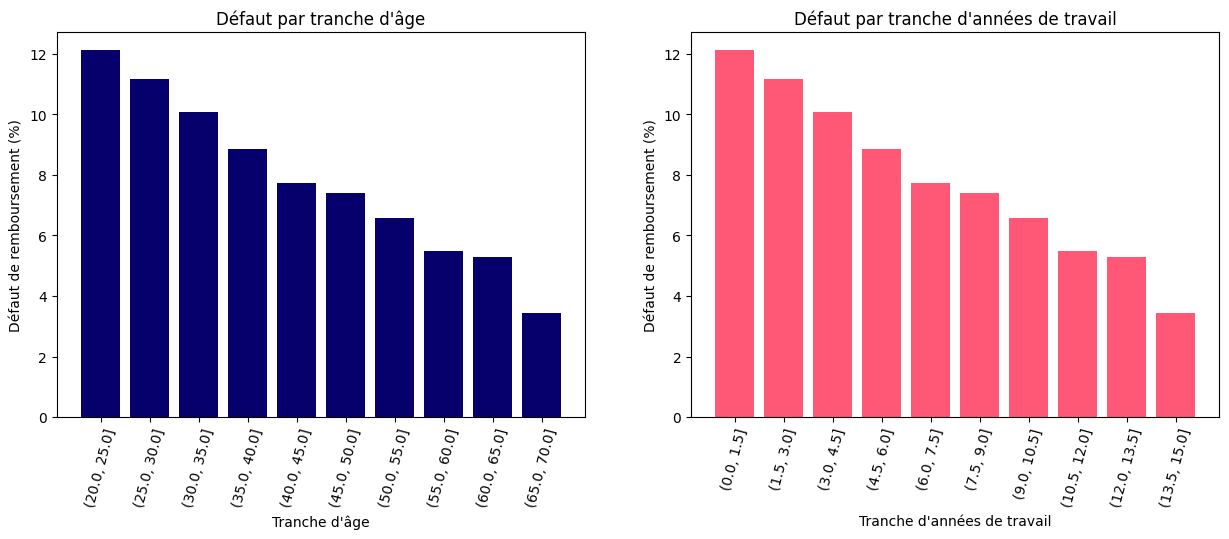

In [54]:
colors = ['#06006C','#FF5876']

# Définit la taille de la figure
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'], color=colors[0])
plt.xticks(rotation = 75)
plt.xlabel("Tranche d'âge")
plt.ylabel('Défaut de remboursement (%)')
plt.title("Défaut par tranche d'âge")

plt.subplot(1, 2, 2)
plt.bar(years_of_work_groups.index.astype(str), 100 * age_groups['TARGET'], color=colors[1])
plt.xticks(rotation = 75)
plt.xlabel("Tranche d'années de travail")
plt.ylabel('Défaut de remboursement (%)')
plt.title("Défaut par tranche d'années de travail")

plt.show()

--> On remarque que le taux de défaut diminue avec l'âge des clients ou leur nombre d'années de travail

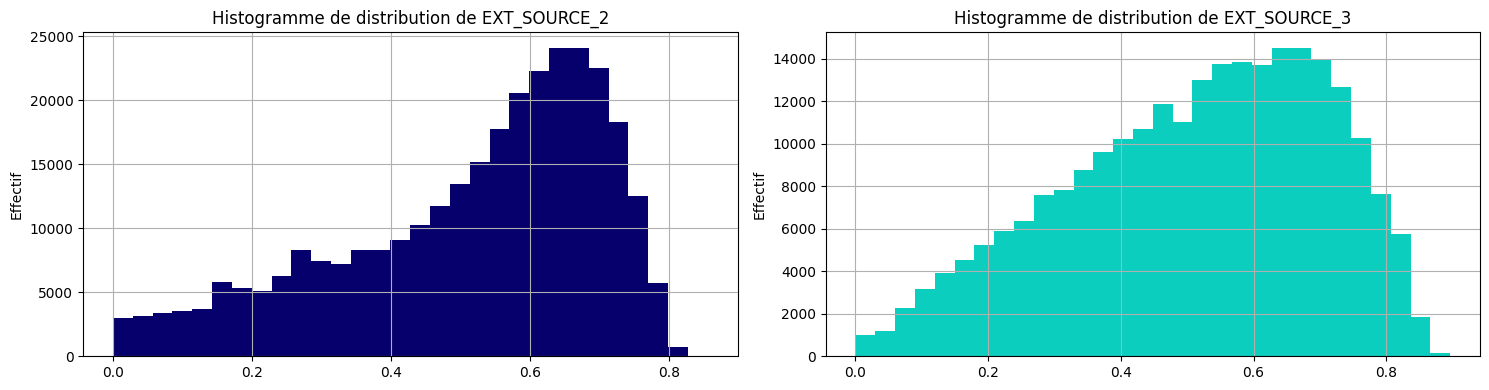

In [55]:
# Variables à tester
var_to_test = ["EXT_SOURCE_2", "EXT_SOURCE_3"]
colors = ['#06006C','#0BCEBF']

# Créer une figure et des sous-graphiques
fig, axes = plt.subplots(1, len(var_to_test), figsize=(15, 4))

# Itérer sur les variables et dessiner les histogrammes
for i, var in enumerate(var_to_test):
    # Dessiner l'histogramme pour la variable spécifiée
    (cleaned_data[var]).hist(ax=axes[i], color=colors[i], bins=30)
    # Ajouter des titres et des étiquettes
    axes[i].set_title("Histogramme de distribution de " + var)
    axes[i].set_ylabel("Effectif")

# Ajuster la disposition
plt.tight_layout()
plt.show()

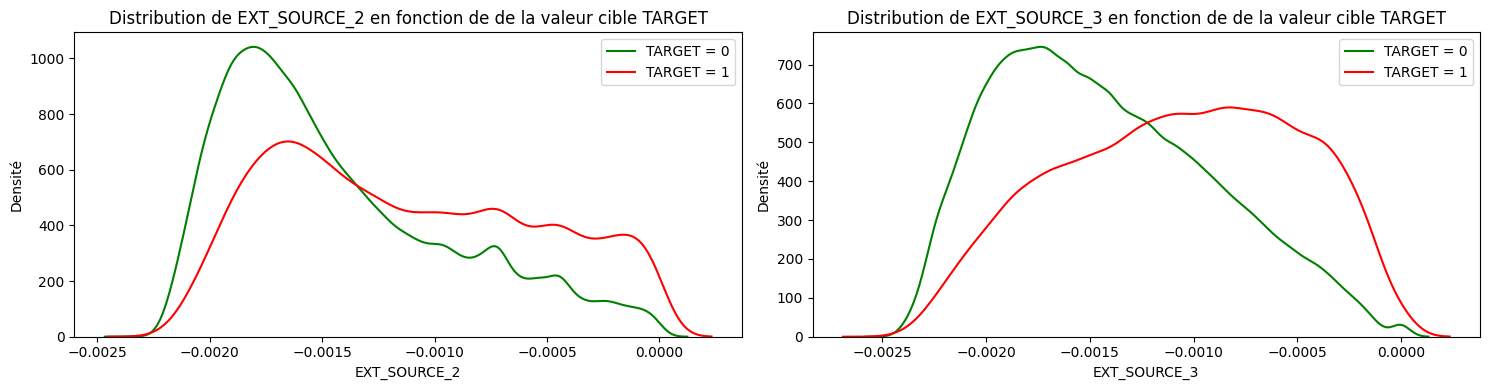

In [56]:
# Variables à tester
var_to_test = ["EXT_SOURCE_2", "EXT_SOURCE_3"]
colors = ['red','green']

# Créer une figure et des sous-graphiques
fig, axes = plt.subplots(1, len(var_to_test), figsize=(15, 4))

# Itérer sur les variables et dessiner les histogrammes
for i, var in enumerate(var_to_test):
    # Dessiner l'histogramme pour la variable spécifiée
    sns.kdeplot((cleaned_data.loc[cleaned_data['TARGET'] == 0, var] / -365), ax=axes[i], color=colors[1], label = 'TARGET = 0')
    sns.kdeplot((cleaned_data.loc[cleaned_data['TARGET'] == 1, var] / -365), ax=axes[i], color=colors[0], label = 'TARGET = 1')
    # Ajouter des titres et des étiquettes
    axes[i].set_title("Distribution de " + var + " en fonction de de la valeur cible TARGET")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Densité")
    axes[i].legend()

# Ajuster la disposition
plt.tight_layout()
plt.show()

**********************************

In [57]:
# Crée une copie du DataFrame data
data_cleaned = cleaned_data.copy(deep=True)
# Enregistre le DataFrame cleaned_data dans un fichier CSV
data_cleaned.to_csv("../Data/app_train_cleaned_data.csv", index=False)

IV. PreProcessing et Modélisation
**********************************

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_selection import SelectKBest

from imblearn.over_sampling import SMOTE

from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.dummy import DummyClassifier

from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

from sklearn import set_config
set_config(display='diagram')

import warnings
warnings.filterwarnings('ignore')

import shap


**PREPROCESSING**
*****************

A. Création d'un jeu de données d'entraînement  et de test

In [59]:
X = data_cleaned.drop(columns="TARGET")
Y = data_cleaned["TARGET"]

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, stratify=Y, random_state=0)

In [61]:
print("X_train : ")
print(f" - Nombre de lignes : {X_train.shape[0]}")
print(f" - Nombre de colonnes : {X_train.shape[1]}")

print("Y_train : ")
print(f" - Nombre de lignes : {Y_train.shape[0]}")

print("\nX_test : ")
print(f" - Nombre de lignes : {X_test.shape[0]}")
print(f" - Nombre de colonnes : {X_test.shape[1]}")

print("Y_test : ")
print(f" - Nombre de lignes : {Y_test.shape[0]}")


X_train : 
 - Nombre de lignes : 246008
 - Nombre de colonnes : 72
Y_train : 
 - Nombre de lignes : 246008

X_test : 
 - Nombre de lignes : 61503
 - Nombre de colonnes : 72
Y_test : 
 - Nombre de lignes : 61503


In [62]:
X_train_echantillon, _ , Y_train_echantillon, _ = train_test_split(X_train, Y_train, train_size=0.05, stratify=Y_train, random_state=0)

B. Création de nouvelles variables métier

**Nouvelles variables métier :**

- CREDIT_INCOME_PERCENT = AMT_CREDIT / AMT_INCOME_TOTAL
- ANNUITY_INCOME_PERCENT = AMT_ANNUITY / AMT_INCOME_TOTAL
- CREDIT_LENGTH = AMT_CREDIT / AMT_ANNUITY
- DAYS_EMPLOYED_PERCENT = DAYS_EMPLOYED / DAYS_BIRTH
- INCOME_PER_PERSON = AMT_INCOME_TOTAL / CNT_FAM_MEMBERS

In [63]:
class NewsVars (BaseEstimator, TransformerMixin):

    def fit(self, X, Y=None):
        return self

    def transform(self, X, Y=None):
        X['CREDIT_INCOME_PERCENT'] = X['AMT_CREDIT'].div(X['AMT_INCOME_TOTAL']).replace(np.inf, np.nan )
        X['ANNUITY_INCOME_PERCENT'] = X['AMT_ANNUITY'].div(X['AMT_INCOME_TOTAL']).replace(np.inf, np.nan )
        X['CREDIT_LENGTH'] = X['AMT_CREDIT'].div(X['AMT_ANNUITY']).replace(np.inf, np.nan )
        X['DAYS_EMPLOYED_PERCENT'] = X['DAYS_EMPLOYED'].div(X['DAYS_BIRTH']).replace(np.inf, np.nan )
        X['INCOME_PER_PERSON'] = X['AMT_INCOME_TOTAL'].div(X['CNT_FAM_MEMBERS']).replace(np.inf, np.nan )
        return X

In [64]:
news_vars = NewsVars()

C. Imputation, encodage et standardisation des données

    a. Variables quantitatives :
        - Imputation des valeurs manquantes par la moyenne
        - Standardisation

In [65]:
var_quant = make_column_selector(dtype_include=['int64', 'float64'])

In [66]:
var_quant_simple_imputer = SimpleImputer(strategy='mean')
var_quant_standard_scaler = StandardScaler()

In [67]:
var_quant_pipeline = Pipeline([('var_quant_imputer', var_quant_simple_imputer), ('var_quant_scaler', var_quant_standard_scaler)])

    b. Variables qualitatives :
        - Imputation des valeurs manquantes par la valeur la plus fréquente
        - Encodage pour les transformer en valeurs numériques

In [68]:
var_qual = make_column_selector(dtype_include=['category'])

In [69]:
var_qual_simple_imputer = SimpleImputer(strategy='most_frequent')
var_qual_one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

In [70]:
var_qual_pipeline = Pipeline([('cat_imputer', var_qual_simple_imputer), ('cat_encoder', var_qual_one_hot_encoder)])

In [71]:
var_preprocessor = make_column_transformer((var_quant_pipeline, var_quant), (var_qual_pipeline, var_qual))

**MODELISATION**
****************

A. Ré-échantillonnage des données

Application de la méthode de suréchantillonnage SMOTE (Synthetic Minority Oversampling Technique) pour rééquilibrer les classes.

In [72]:
oversampling = SMOTE()

B. Sélection des variables pertinentes

Application de la méthode SelectKBest pour choisir les variables les plus pertinentes

In [73]:
best_var_selector = SelectKBest()

C. Choix de la métrique :

La métrique doit permettre de :

    a. Minimiser les faux négatifs : c'est le risque le plus important pour la banque -> le modèle prédit 0 alors que la cible est 1, donc la banque prête et ne sera pas remboursée.
       -> Il faut maximiser le Recall pour pallier à ça.

    b. Minimiser les faux positifs : c'est un risque moins important pour la banque -> le modèle prédit 1 alors que la cible est 0, donc la banque ne prête pas alors qu'elle aurait été remboursée.
       -> Il ne faut pas prédire uniquement des valeurs de 0, car la banque doit aussi accorder des prêts pour gagner de l'argent.
       -> Il faut maximiser la Precision pour pallier à ça.

--> Un compromis est nécessaire entre la maximisation du Recall et la maximisation de la Precision, en mettant davantage l'accent sur le Recall, car il correspond au risque le plus important pour la banque.

Métrique choisie : 

    - AUROC : pour optimiser les hyperparamètres et choisir parmi tous les modèles quel est le modèle le plus performant
    - F-Beta : pour optimiser le modèle le plus performant, avec un Beta = 3 pour surpondérer le Recall par rapport à la Precision

In [74]:
fthree_scorer = make_scorer(fbeta_score, beta=3)

D. Choix des modèles 

In [75]:
# Initialisation du dictionnaire pour stocker les modèles et leurs grilles de paramètres
dict_model_param = {}

# Modèles linéaires
## LogisticRegression
model_logisticregression = LogisticRegression(random_state=0)
param_grid_logisticregression = {
    'selectkbest__k': [10, 20, 30, 40, 50, 60, 72],  # Nombre de caractéristiques à sélectionner
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Types de régularisation
    'logisticregression__C': [0.01, 0.1, 1, 10, 100]  # Paramètre de régularisation inverse
}
dict_model_param['logisticregression'] = [model_logisticregression, param_grid_logisticregression]

## SGDClassifier
model_sgdclassifier = SGDClassifier(random_state=0)
param_grid_sgdclassifier = {
    'selectkbest__k': [10, 20, 30, 40, 50, 60, 72],  # Nombre de caractéristiques à sélectionner
    'sgdclassifier__loss': ['hinge', 'log', 'squared_loss'],  # Fonctions de perte
    'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet'],  # Types de régularisation
    'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1]  # Taux d'apprentissage
}
dict_model_param['sgdclassifier'] = [model_sgdclassifier, param_grid_sgdclassifier]

# Modèles non linéaires
## Kernel SVC
model_svc = SVC(random_state=0)
param_grid_svc = {
    'selectkbest__k': [10, 20, 30, 40, 50, 60, 72],  # Nombre de caractéristiques à sélectionner
    'svc__kernel': ['poly', 'sigmoid', 'rbf'],  # Types de noyau
    'svc__C': [0.001, 0.1, 1, 10, 100, 1000]  # Paramètre de régularisation
}
dict_model_param['svc'] = [model_svc, param_grid_svc]

# Modèles ensemblistes
## RandomForestClassifier
model_randomforestclassifier = RandomForestClassifier(random_state=0)
param_grid_randomforestclassifier = {
    'selectkbest__k': [10, 20, 30, 40, 50, 60, 72],  # Nombre de caractéristiques à sélectionner
    'randomforestclassifier__max_depth': [3, 5, 7, 10, None],  # Profondeur maximale des arbres
    'randomforestclassifier__max_features': ['sqrt', 'log2']  # Nombre de caractéristiques à considérer
}
dict_model_param['randomforestclassifier'] = [model_randomforestclassifier, param_grid_randomforestclassifier]

## AdaBoostClassifier
model_adaboost = AdaBoostClassifier(random_state=0)
param_grid_adaboost = {
    'selectkbest__k': [10, 20, 30, 40, 50, 60, 70],  # Nombre de caractéristiques à sélectionner
    'adaboostclassifier__learning_rate': [0.001, 0.01, 0.1, 1]  # Taux d'apprentissage
}
dict_model_param['adaboostclassifier'] = [model_adaboost, param_grid_adaboost]

## HistGradientBoostingClassifier
model_histgradientboosting = HistGradientBoostingClassifier(random_state=0)
param_grid_histgradientboosting = {
    'selectkbest__k': [10, 20, 30, 40, 50, 60, 70],  # Nombre de caractéristiques à sélectionner
    'histgradientboostingclassifier__learning_rate': [0.001, 0.01, 0.1],  # Taux d'apprentissage
    'histgradientboostingclassifier__max_iter': [10, 30, 50, 150, 200],  # Nombre d'itérations
    'histgradientboostingclassifier__max_depth': [3, 7, 9, None]  # Profondeur maximale des arbres
}
dict_model_param['histgradientboosting'] = [model_histgradientboosting, param_grid_histgradientboosting]

# Modèle de référence Dummy Classifier
model_dummy = DummyClassifier(random_state=0, strategy="constant", constant=0)
param_grid_dummy = {}  # Aucun paramètre pour le modèle de base
dict_model_param['dummy'] = [model_dummy, param_grid_dummy]

V. Entraînement et Évaluation

**ENTRAINEMENT**
****************

In [76]:
def train(model, param_grid, X_train, y_train):
    model_pipeline = make_pipeline(news_vars, var_preprocessor, oversampling, best_var_selector, model)
    stratified_cv = StratifiedKFold(shuffle=True, random_state=0)
    grid_search = GridSearchCV(model_pipeline, param_grid, scoring='roc_auc', cv=stratified_cv, return_train_score=True)
    grid_search_result_fit = grid_search.fit(X_train, y_train)
    return grid_search_result_fit

In [78]:
cv_results={}
best_params={}
best_score={}
best_index={}
best_estimator={}
best_mean_train_score={} 
best_mean_test_score={}
best_mean_fit_time={}

for model, param in dict_model_param.items():

    # entrainement
    grid_search_result_fit = train(param[0], param[1], X_train_echantillon, Y_train_echantillon)

    # sauvegarde des résultats
    cv_results_df = pd.DataFrame(grid_search_result_fit.cv_results_)
    best_mean_train_score[model] = cv_results_df["mean_train_score"][grid_search_result_fit.best_index_]
    best_mean_test_score[model] = cv_results_df["mean_test_score"][grid_search_result_fit.best_index_]
    best_mean_fit_time[model] = cv_results_df["mean_fit_time"][grid_search_result_fit.best_index_]
    cv_results[model] = grid_search_result_fit.cv_results_
    best_params[model] = grid_search_result_fit.best_params_
    best_score[model] = grid_search_result_fit.best_score_
    best_index[model] = grid_search_result_fit.best_index_
    best_estimator[model] = grid_search_result_fit.best_estimator_
    
    # affichage des résultats
    print("\n",model)
    print("- Best params : ", grid_search_result_fit.best_params_)
    print("- Best index : ", grid_search_result_fit.best_index_)
    print("\n- Best mean_train_score = ", best_mean_train_score[model])
    print("- Best mean_test_score = ", best_mean_test_score[model])
    print("- Best mean_fit_time = ", best_mean_fit_time[model])


 logisticregression
- Best params :  {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'selectkbest__k': 30}
- Best index :  37

- Best mean_train_score =  0.7439069573805149
- Best mean_test_score =  0.7357107243957423
- Best mean_fit_time =  0.32722787857055663

 sgdclassifier
- Best params :  {'selectkbest__k': 30, 'sgdclassifier__alpha': 0.01, 'sgdclassifier__loss': 'hinge', 'sgdclassifier__penalty': 'elasticnet'}
- Best index :  92

- Best mean_train_score =  0.7412077017240339
- Best mean_test_score =  0.7346250500072079
- Best mean_fit_time =  0.29706759452819825

 svc
- Best params :  {'selectkbest__k': 10, 'svc__C': 0.001, 'svc__kernel': 'sigmoid'}
- Best index :  1

- Best mean_train_score =  0.7218961634920991
- Best mean_test_score =  0.7206909497915076
- Best mean_fit_time =  16.337207555770874

 randomforestclassifier
- Best params :  {'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 'log2', 'selectkbest__k': 50}
- Best

--> Récapitulatif des meilleurs train scores, test scores et fit time pour chaque modèle


BEST MEAN TEST SCORES
logisticregression: 0.73571
sgdclassifier: 0.73463
histgradientboosting: 0.72238
svc: 0.72069
randomforestclassifier: 0.70694
adaboostclassifier: 0.69659
dummy: 0.50000

BEST MEAN TRAIN SCORES
randomforestclassifier: 1.00000
histgradientboosting: 0.87222
logisticregression: 0.74391
sgdclassifier: 0.74121
svc: 0.72190
adaboostclassifier: 0.71750
dummy: 0.50000

BEST MEAN FIT TIME
dummy: 0.24804
sgdclassifier: 0.29707
logisticregression: 0.32723
histgradientboosting: 1.00442
adaboostclassifier: 3.63110
randomforestclassifier: 4.58981
svc: 16.33721



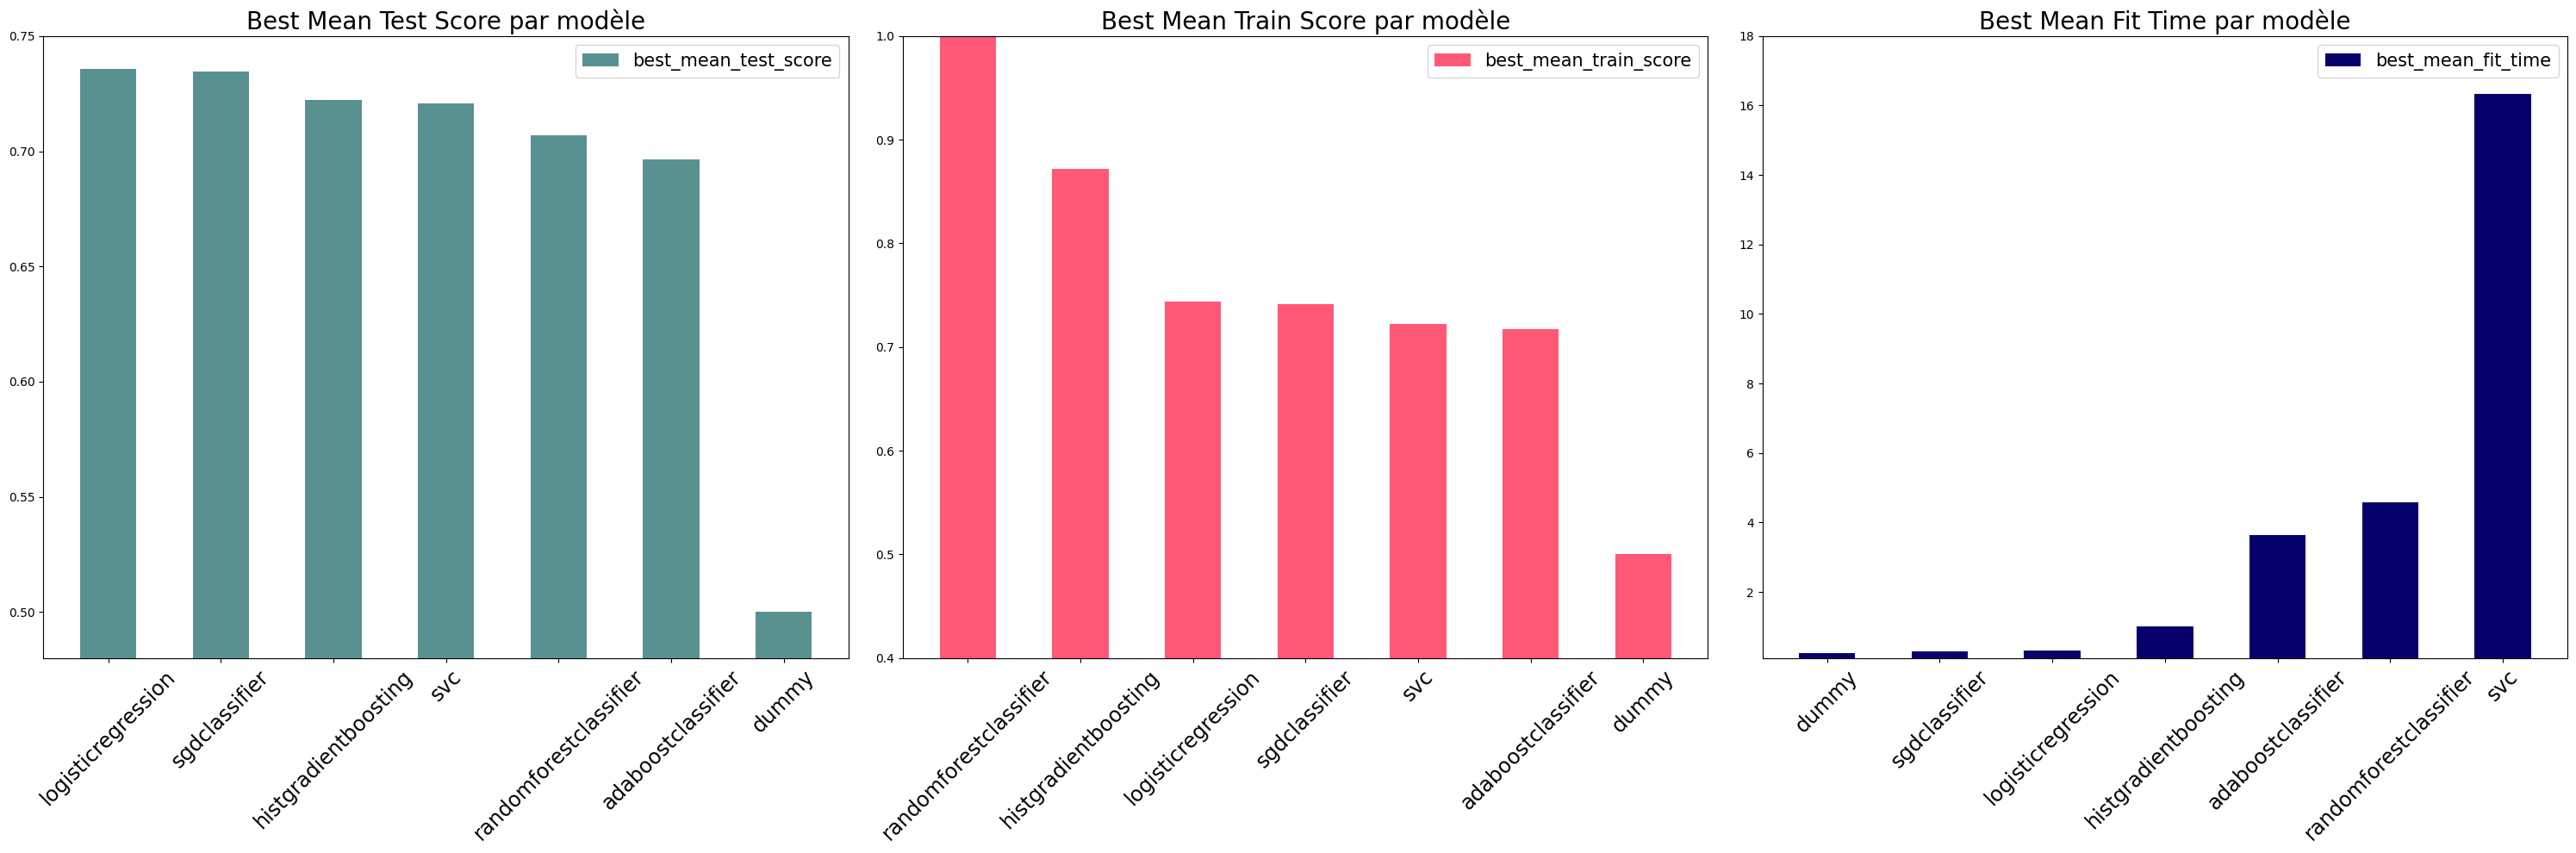

In [79]:
# Trier les scores
best_mean_train_score_sorted = sorted(best_mean_train_score.items(), key=lambda item: item[1], reverse=True)
best_mean_test_score_sorted = sorted(best_mean_test_score.items(), key=lambda item: item[1], reverse=True)
best_mean_fit_time_sorted = sorted(best_mean_fit_time.items(), key=lambda item: item[1])

# Fonction générique pour tracer les métriques
def plot_metric(ax, data, color, label, ylim, title):
    width = 0.5
    keys, values = zip(*data)
    ind = np.arange(len(data))

    ax.bar(ind, values, width, color=color, label=label)
    ax.set_xticks(ind)
    ax.set_xticklabels(keys, size='xx-large', rotation=45)
    ax.set_ylim(ylim)
    ax.legend(fontsize=15)
    ax.set_title(title, fontsize=20)

# Créer une figure avec 3 sous-graphiques côte à côte
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Afficher les scores et tracer les graphiques
def display_scores_and_plot(title, sorted_scores, ax, color, label, ylim, plot_title):
    print(f"\n{title}")
    for k, v in sorted_scores:
        print(f"{k}: {v:.5f}")
    plot_metric(ax, sorted_scores, color, label, ylim, plot_title)

# Afficher et tracer les scores et graphiques
display_scores_and_plot("BEST MEAN TEST SCORES", best_mean_test_score_sorted, axes[0], '#599191', 'best_mean_test_score', (0.48, 0.75), "Best Mean Test Score par modèle")
display_scores_and_plot("BEST MEAN TRAIN SCORES", best_mean_train_score_sorted, axes[1], '#FF5876', 'best_mean_train_score', (0.4, 1.0), "Best Mean Train Score par modèle")
display_scores_and_plot("BEST MEAN FIT TIME", best_mean_fit_time_sorted, axes[2], '#06006C', 'best_mean_fit_time', (0.1, 18), "Best Mean Fit Time par modèle")
print()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


--> Modèle retenu : Regression Logistique 

    -> Meilleur Mean Test Score
    -> Faible différence entre Mean Test Score et Mean Train Score (pas d'overfitting)
    -> Rapidité élevée

In [80]:
best_params['logisticregression']

{'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2',
 'selectkbest__k': 30}

In [88]:
best_model = LogisticRegression(random_state=0,
                               C=best_params['logisticregression']['logisticregression__C'], 
                               penalty=best_params['logisticregression']['logisticregression__penalty'])
new_model_pipeline = make_pipeline(news_vars, var_preprocessor, oversampling, SelectKBest(k=best_params['logisticregression']['selectkbest__k']), best_model)
new_model = new_model_pipeline.fit(X_train, Y_train)

In [89]:
new_model

Pipeline(steps=[('newsvars', NewsVars()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('var_quant_imputer',
                                                                   SimpleImputer()),
                                                                  ('var_quant_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023F2C19A1D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023EA09DA710>)])),
                ('smote', SMOTE()), ('selectkbest', SelectKBest(k=30)),
                ('logisticregression',
                 LogisticRegression(C=0.1, random_state=0))])

**EVALUATION**
**************

AUC Score = 0.67

              precision    recall  f1-score   support

           0       0.96      0.69      0.80    226148
           1       0.16      0.66      0.25     19860

    accuracy                           0.68    246008
   macro avg       0.56      0.67      0.53    246008
weighted avg       0.89      0.68      0.75    246008



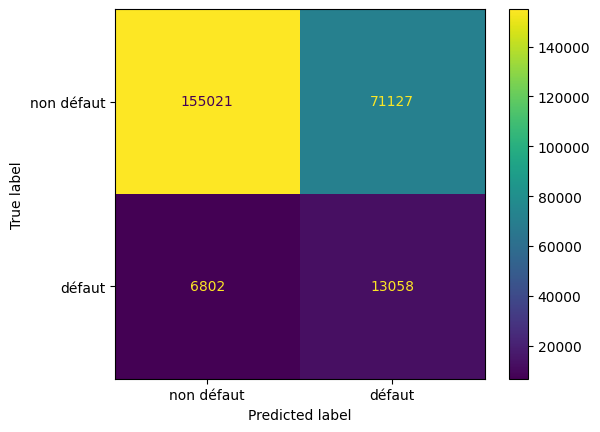

In [105]:
pred_new_model = cross_val_predict(new_model, X_train, Y_train, cv=5)
auc = roc_auc_score(Y_train, pred_new_model)
print(f"AUC Score = {auc:.2f}\n")
cm = confusion_matrix(Y_train, pred_new_model)
cmd = ConfusionMatrixDisplay(cm, display_labels=['non défaut','défaut'])
cmd.plot()
print(classification_report(Y_train, pred_new_model))

VI. Optimisation et Prédiction

**OPTIMISATION**
****************

Nous allons déterminer le seuil de décision sur les probabilités qui maximise la métrique cible F-Beta avec un coefficient de 3.

In [94]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

def model_final(model, X, threshold):
    return model.predict_proba(X)[:,1] > threshold

In [95]:
prob_pos = new_model.predict_proba(X_train)[:, 1]
print("Probabilités prédites :")
prob_pos

Probabilités prédites :


array([0.56255414, 0.42557743, 0.81415604, ..., 0.38931238, 0.33054335,
       0.38397314])

In [96]:
thresholds = np.arange(0, 1, 0.001)

In [97]:
scores_fbeta = [fbeta_score(Y_train, to_labels(prob_pos, t), beta=3) for t in thresholds]

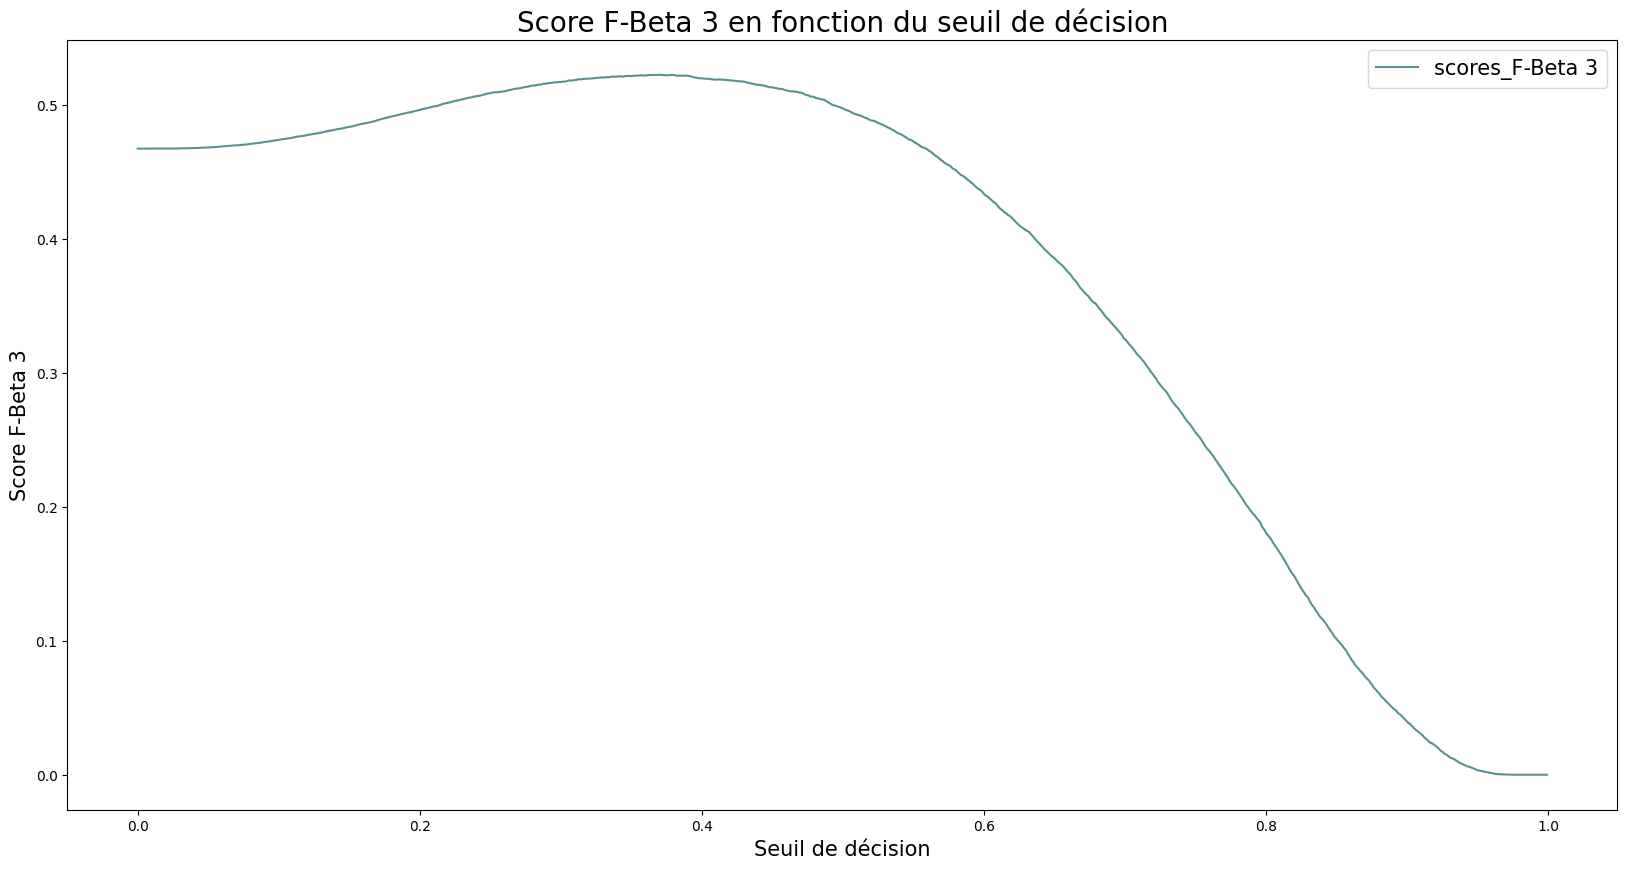

In [98]:
plt.figure(figsize=(20,10))
plt.plot(thresholds, scores_fbeta, color='#599191', label='scores_F-Beta 3')
plt.legend(fontsize=15)
plt.xlabel("Seuil de décision", fontsize=15)
plt.ylabel("Score F-Beta 3", fontsize=15)
plt.title("Score F-Beta 3 en fonction du seuil de décision", fontsize=20)
plt.show()

Ici, nous voyons comment le score F-Beta 3 varie avec le seuil de décision. Comme indiqué, le score F-Beta 3 atteint son maximum autour d'un seuil compris entre 0.3 et 0.4. Ce pic représente notre seuil optimal.

En ajustant notre seuil de décision à ce niveau optimal, nous pouvons mieux identifier les clients susceptibles de faire défaut sur leurs prêts, minimisant ainsi les pertes pour la banque. En même temps, nous réduisons le nombre de faux positifs, évitant ainsi de refuser des prêts à des clients solvables.

Pour conclure, cette optimisation du seuil de décision est une étape cruciale pour améliorer la performance de notre modèle de scoring. Elle nous aide à prendre des décisions de prêt plus informées et équilibrées

In [99]:
ix_best_fbeta = np.argmax(scores_fbeta)
best_threshold_fbeta = thresholds[ix_best_fbeta]
best_score_fbeta = scores_fbeta[ix_best_fbeta]

print('Best Score F-Beta 3 Threshold = %.3f, Best Score F-Beta 3 = %.3f' % (best_threshold_fbeta, best_score_fbeta))

Best Score F-Beta 3 Threshold = 0.371, Best Score F-Beta 3 = 0.523


In [100]:
precision, recall, threshold = precision_recall_curve(Y_train, prob_pos)

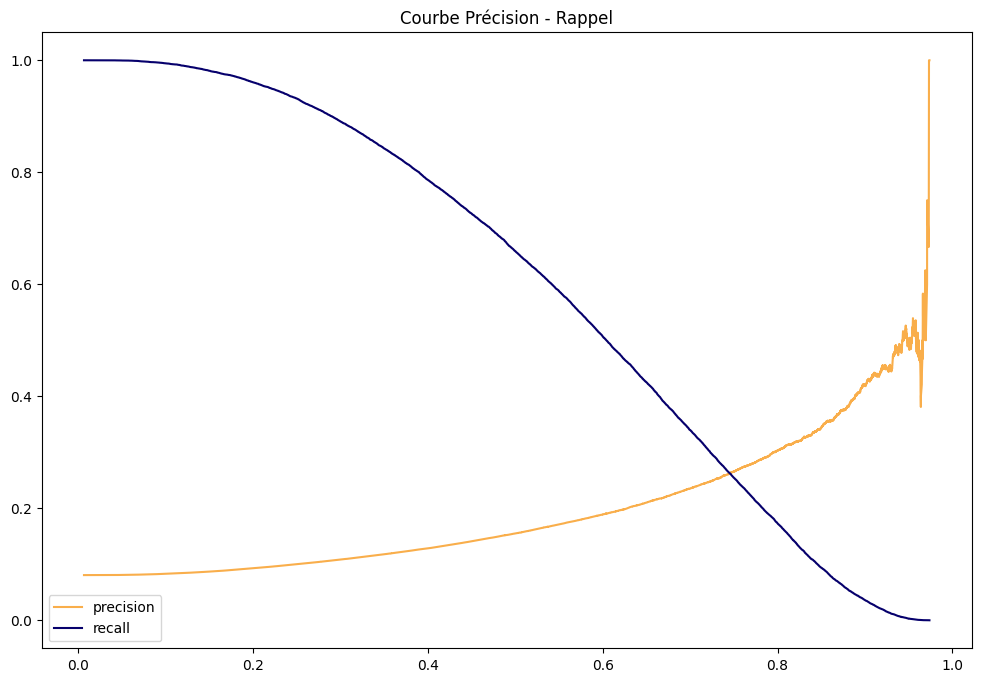

In [101]:
plt.figure(figsize=(12,8))
plt.plot(threshold, precision[:-1], color='#F9AE4B', label='precision')
plt.plot(threshold, recall[:-1], color='#06006C', label='recall')
plt.legend()
plt.title("Courbe Précision - Rappel")
plt.show()

Le score F-Beta 3 est de 0.523, ce qui reflète un bon équilibre entre la précision (vrais positifs) et la rappel (vrais négatifs), favorisant une grande importance à la détection des défauts de paiement.
Seuil Optimal : Le seuil de 0.371 est le point d’équilibre qui maximise ce score. Cela signifie que pour prédire un client comme étant en défaut, nous utilisons une probabilité supérieure ou égale à 0.371.

--> Comparaison sans et avec optimisation du seuil de décision

F-Beta3 Score = 0.50

              precision    recall  f1-score   support

           0       0.96      0.68      0.80    226148
           1       0.16      0.66      0.25     19860

    accuracy                           0.68    246008
   macro avg       0.56      0.67      0.52    246008
weighted avg       0.89      0.68      0.75    246008



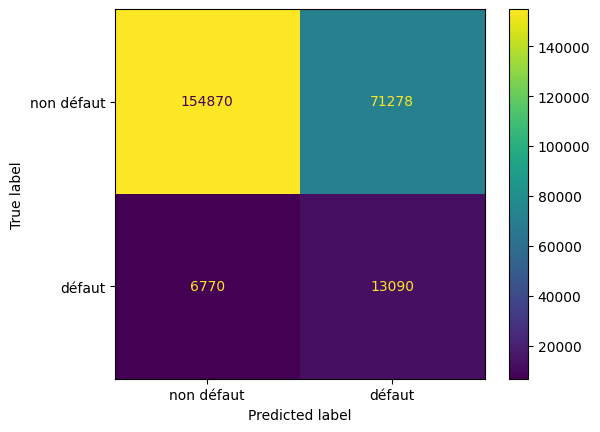

In [102]:
Y_pred = model_final(new_model, X_train, 0.5)
fbeta = fbeta_score(Y_train, Y_pred, beta=3)
print(f"F-Beta3 Score = {fbeta:.2f}\n")
cm = confusion_matrix(Y_train, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['non défaut','défaut'])
cmd.plot()
print(classification_report(Y_train, Y_pred))

F-Beta3 Score = 0.52

              precision    recall  f1-score   support

           0       0.97      0.48      0.64    226148
           1       0.12      0.82      0.21     19860

    accuracy                           0.51    246008
   macro avg       0.55      0.65      0.43    246008
weighted avg       0.90      0.51      0.61    246008



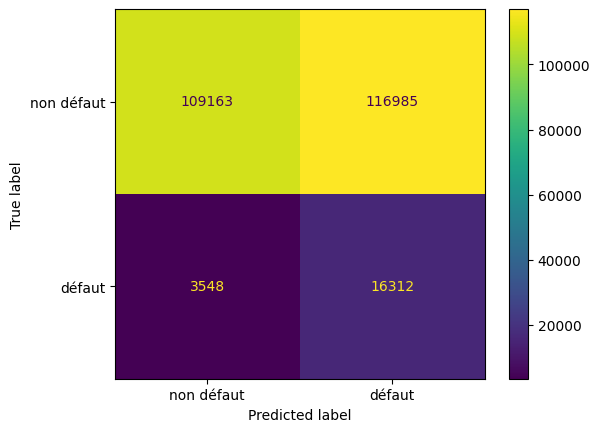

In [103]:
Y_pred_optim = model_final(new_model, X_train, best_threshold_fbeta)
fbeta = fbeta_score(Y_train, Y_pred_optim, beta=3)
print(f"F-Beta3 Score = {fbeta:.2f}\n")
cm = confusion_matrix(Y_train, Y_pred_optim)
cmd = ConfusionMatrixDisplay(cm, display_labels=['non défaut','défaut'])
cmd.plot()
print(classification_report(Y_train, Y_pred_optim))

* Gestion du Risque :
    Une augmentation du rappel permet à la banque de mieux gérer les risques en identifiant plus de clients susceptibles de faire défaut.
    Cela réduit la probabilité d'accorder des prêts à des individus à haut risque, protégeant ainsi la santé financière de la banque.
* Efficacité Opérationnelle :
    Même si la précision est légèrement sacrifiée, le gain en termes de rappel justifie ce compromis.
    Le modèle assure que moins de prêts risqués sont approuvés, réduisant ainsi les pertes potentielles.

**PREDICTION**
**************

F-Beta3 Score = 0.53

              precision    recall  f1-score   support

           0       0.97      0.49      0.65     56538
           1       0.12      0.83      0.22      4965

    accuracy                           0.51     61503
   macro avg       0.55      0.66      0.43     61503
weighted avg       0.90      0.51      0.61     61503



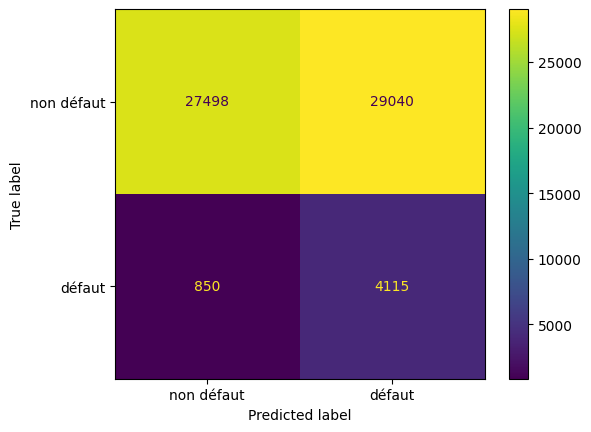

In [107]:
y_pred_optim_test = model_final(new_model, X_test, best_threshold_fbeta)
fbeta = fbeta_score(Y_test, y_pred_optim_test, beta=3)
print(f"F-Beta3 Score = {fbeta:.2f}\n")
cm = confusion_matrix(Y_test, y_pred_optim_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=['non défaut','défaut'])
cmd.plot()
print(classification_report(Y_test, y_pred_optim_test))

VII. Conclusion

Pour l'interprétation du modèle et l'importance des variables nous utilisons la librairie SHAP (SHapley Additive exPlanations) :

    SHAP repose sur les valeurs de Shapley issues de la théorie des jeux :
    - Le 'jeu' correspond à la prédiction du modèle.
    - Les 'joueurs' sont les variables incluses dans le modèle.

    Les valeurs de Shapley quantifient la contribution de chaque joueur au jeu. De même, SHAP quantifie la contribution de chaque variable à la prédiction effectuée par le modèle.

Pour calculer la contribution marginale de chaque variable, SHAP compare la prédiction avec et sans la variable, et cela pour chaque combinaison possible de variables.

    Les avantages principaux de l'utilisation de cette librairie sont les suivants :
    - Agnosticité du modèle : SHAP fonctionne avec n'importe quel type de modèle.
    - Analyse à la fois locale et globale :
      - L'analyse globale permet de comprendre l'importance des variables pour l'ensemble du modèle, c'est-à-dire comment chaque variable influence les prédictions de manière générale.
      - L'analyse locale permet d'expliquer la prédiction pour chaque individu, c'est-à-dire l'impact des variables sur la prédiction d'un cas spécifique.
    
SHAP offre ainsi une compréhension claire et détaillée des contributions des variables, facilitant l'interprétation des modèles complexes.

In [110]:
shap.initjs()

In [111]:
def model_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=X_train.columns)
    return new_model.predict(data_asframe)

In [112]:
shap_kernel_explainer = shap.KernelExplainer(model_predict, X_train)

Using 246008 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [113]:
X_train_summary = shap.sample(X_train, 100)
X_train_summary

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
206216      339026         Cash loans           F            N   
296507      443525         Cash loans           M            N   
64519       174817    Revolving loans           M            Y   
55003       163731         Cash loans           F            N   
217819      352366         Cash loans           F            N   
42676       149404         Cash loans           F            N   
236042      373402         Cash loans           F            N   
108633      226001         Cash loans           F            N   
96003       211459         Cash loans           M            Y   
203573      336011         Cash loans           F            N   
84344       197849         Cash loans           M            Y   
229400      365701         Cash loans           F            N   
186569      316290    Revolving loans           F            Y   
267313      409710         Cash loans           F            Y   
102221      218666         Cash loans           F            N   
267685      410145    Revolving loans           F            N   
168000      294742         Cash loans           F            Y   
127158      247464         Cash loans           F            Y   
156469      281371    Revolving loans           M            Y   
53720       162230         Cash loans           F            N   
263712      405335         Cash loans           M            Y   
10323       112012         Cash loans           F            N   
131657      252695    Revolving loans           F            N   
277000      421020    Revolving loans           M            Y   
304721      453041         Cash loans           F            N   
118929      237906         Cash loans           F            Y   
262052      403332    Revolving loans           M            N   
256532      396853         Cash loans           F            Y   
304647      452957         Cash loans           M            N   
289939      435898         Cash loans           F            N   
271185      414387         Cash loans           M            N   
216331      350661         Cash loans           F            Y   
152386      276624         Cash loans           F            Y   
300416      448044         Cash loans           F            N   
76766       189024         Cash loans           F            N   
201795      333918    Revolving loans           F            N   
251899      391467         Cash loans           F            N   
210906      344417         Cash loans           F            N   
160361      285899         Cash loans           M            N   
194137      325109         Cash loans           M            Y   
159738      285171         Cash loans           F            N   
241978      380172         Cash loans           F            Y   
55237       164003         Cash loans           F            N   
84482       198010         Cash loans           F            Y   
18434       121505         Cash loans           F            N   
156732      281666         Cash loans           F            Y   
278706      422886         Cash loans           F            N   
296818      443886    Revolving loans           F            N   
261715      402958         Cash loans           M            N   
214276      348302         Cash loans           F            N   
129711      250446         Cash loans           F            N   
134814      256371         Cash loans           M            N   
23711       127589         Cash loans           M            Y   
271329      414545         Cash loans           F            N   
139657      261932         Cash loans           F            Y   
103700      220351         Cash loans           F            N   
38203       144241         Cash loans           M            Y   
285748      430943         Cash loans           F            N   
144769      267866         Cash loans           F            N   
165356      291686         Cash loans           

--> Interprétation globale du modèle

In [135]:
shap_values_all = shap_kernel_explainer.shap_values(X_test.iloc[0:100,:])

  0%|          | 0/100 [00:00<?, ?it/s]

In [185]:
shap.force_plot(shap_kernel_explainer.expected_value, shap_values_all, X_test.iloc[0:100,:])

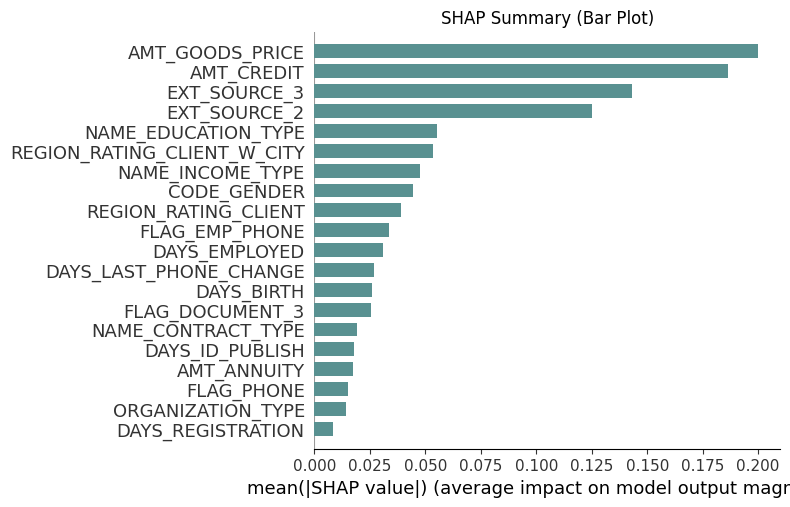

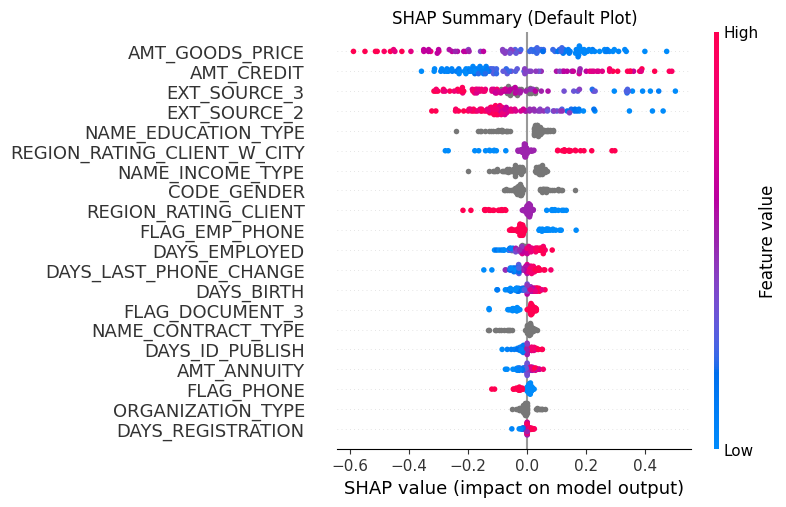

<Figure size 640x480 with 0 Axes>

In [181]:
plt.subplot(2, 1, 2)
plt.title('SHAP Summary (Bar Plot)')
shap.summary_plot(shap_values_all, X_test.iloc[:100, :], plot_type='bar', color='#599191')

# Deuxième graphique à droite (type par défaut)
plt.subplot(2, 1, 1)
plt.title('SHAP Summary (Default Plot)')
shap.summary_plot(shap_values_all, X_test.iloc[:100, :])

plt.tight_layout()  # Pour améliorer l'espacement entre les sous-graphiques
plt.show()

Les 10 variables les plus importantes sont :

    - AMT_GOODS_PRICE
    - AMT_CREDIT
    - EXT_SOURCE_2
    - EXT_SOURCE_3
    - NAME_EDUCATION_TYPE
    - REGION_RATING_CLIENT_W_CITY
    - NAME_INCOME_TYPE
    - CODE_GENDER
    - REGION_RATING_CLIENT
    - FLAG_EMP_PHONE

    Impact des Caractéristiques :
        -> AMT_GOODS_PRICE : Des valeurs élevées (en rouge) ont tendance à réduire la probabilité de recevoir un prêt (valeurs SHAP négatives).
        -> AMT_CREDIT : Similaire à AMT_GOODS_PRICE, des montants de crédit plus élevés diminuent la probabilité d'approbation.
        -> EXT_SOURCE_3 et EXT_SOURCE_2 : Des valeurs élevées (rouge) augmentent la probabilité de recevoir un prêt (valeurs SHAP positives), indiquant que des scores externes élevés sont perçus positivement.
        -> NAME_EDUCATION_TYPE : Un niveau d'éducation plus élevé (rouge) a un impact positif sur la probabilité d'approbation.
        -> REGION_RATING_CLIENT_W_CITY et REGION_RATING_CLIENT : Les évaluations régionales ont un impact significatif, des évaluations plus faibles diminuant la probabilité d'approbation.
        -> DAYS_EMPLOYED : Plus de jours employés (rouge) augmentent la probabilité d'approbation, indiquant une stabilité de l'emploi.
        -> DAYS_LAST_PHONE_CHANGE : Des changements fréquents de téléphone (bleu) sont perçus négativement.
        -> DAYS_BIRTH : Un âge plus avancé (bleu) tend à réduire la probabilité d'approbation, tandis qu'un âge plus jeune (rouge) est perçu positivement.
    
Conclusion :
        
        --> Le modèle accorde une grande importance aux montants financiers (AMT_GOODS_PRICE et AMT_CREDIT), ainsi qu'aux scores externes (EXT_SOURCE_2 et EXT_SOURCE_3).
        --> La stabilité financière et personnelle (comme l'emploi stable et la faible fréquence des changements de téléphone) est perçue positivement par le modèle.
        --> Les caractéristiques démographiques et régionales (comme l'éducation, le type de revenu et la région) jouent également un rôle crucial dans la prédiction.

--> Interprétation locale (exemple individu index 15)

In [182]:
shap_values_single = shap_kernel_explainer.shap_values(X_test.iloc[15])

In [183]:
shap.force_plot(shap_kernel_explainer.expected_value, shap_values_single, X_test.iloc[[15]])

Facteurs Positifs (en bleu) :

    Ces caractéristiques réduisent la probabilité que le client fasse défaut sur le prêt, c'est-à-dire qu'elles augmentent la probabilité d'approbation.
        - AMT_GOODS_PRICE = 1.8e+6 : Le montant des biens achetés (1,800,000) a un effet modérément positif, contribuant à augmenter la probabilité de ne pas faire défaut.
        - EXT_SOURCE_2 = 0.7966 : Cette source externe de score, avec une valeur de 0,7966, a un effet positif significatif sur la probabilité de ne pas faire défaut, indiquant que le client a un bon score externe.
        - REGION_RATING_CLIENT_W_CITY = 1 : La note de la région du client (égale à 1) a également un effet positif.

Facteurs Négatifs (en rouge) :

    Ces caractéristiques augmentent la probabilité que le client fasse défaut sur le prêt, c'est-à-dire qu'elles réduisent la probabilité d'approbation.
        - REGION_RATING_CLIENT = 1 : La note de la région (égale à 1) a un effet négatif modéré, augmentant la probabilité de défaut.
        - AMT_CREDIT = 1.8e+6 : Le montant du crédit demandé (1,800,000) a un effet négatif très significatif, augmentant fortement la probabilité de défaut.

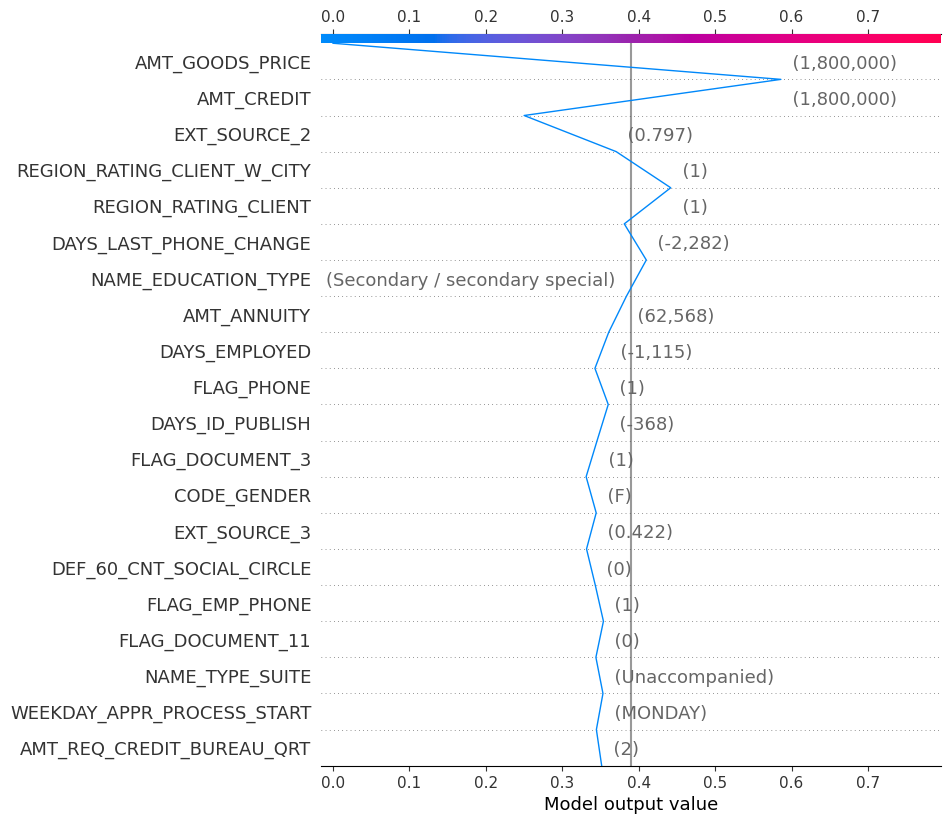

In [184]:
shap.decision_plot(shap_kernel_explainer.expected_value, shap_values_single, X_test.iloc[[15]])

Les variables qui expliquent le plus le résultat pour cet individu sont :

    - AMT_GOODS_PRICE
    - AMT_CREDIT
    - EXT_SOURCE_2
    - REGION_RATING_CLIENT_W_CITY
    - REGION_RATING_CLIENT
    - DAYS_LAST_PHONE_CHANGE

    La propension du client à faire défaut sur le prêt semble être élevée, principalement en raison de :
    
        -> Montant élevé du prêt demandé (AMT_CREDIT).
        -> Montant élevé des biens achetés avec le prêt (AMT_GOODS_PRICE).
        -> Notes de région faibles (REGION_RATING_CLIENT_W_CITY et REGION_RATING_CLIENT).
        -> Changements fréquents de téléphone (DAYS_LAST_PHONE_CHANGE).
        -> Niveau d'éducation relativement bas (NAME_EDUCATION_TYPE).
    
    Cependant, il y a aussi des facteurs positifs qui réduisent cette propension, tels que :
    
        -> Un bon score externe (EXT_SOURCE_2).
        -> Une capacité de remboursement relativement élevée (AMT_ANNUITY).
        -> Stabilité d'emploi (DAYS_EMPLOYED).

--> En conclusion, bien que ce client présente plusieurs facteurs de risque importants, il y a aussi des éléments positifs qui pourraient contrebalancer ces risques. L'évaluation finale dépendrait de la manière dont le modèle de scoring de la banque pondère ces différentes variables